# **1. Descripción del problema e inspección del conjunto de datos**

## **1.1 Acerca del dataset**
El conjunto de datos proviene del SIVIGILA y contiene casos notificados de dengue filtrados desde el 2022 hasta el 2024. Cada fila representa un evento de notificación clínico/epidemiológico con información temporal (fecha/semana/año), ubicación (departamento/municipio), y otras características del caso.


## **1.2  Descripción del problema**
El **dengue** es una enfermedad viral transmitida por el mosquito *Aedes aegypti*, considerada uno de los principales problemas de salud pública en regiones tropicales y subtropicales. En Colombia, el Sistema Nacional de Vigilancia en Salud Pública (**SIVIGILA**) recopila información detallada de los casos notificados en todo el país, permitiendo analizar su comportamiento a lo largo del tiempo y en diferentes zonas geográficas.
El análisis de estos registros ofrece una base sólida para **comprender las variaciones temporales y espaciales del dengue**, identificar picos de incidencia y anticipar posibles brotes.  
> **Importancia:** trabajar con datos históricos del SIVIGILA permite desarrollar modelos predictivos capaces de **proyectar la evolución del dengue en periodos mensuales**, ayudando a anticipar aumentos en los casos y reducir el impacto de brotes epidémicos.
En este caso, el objetivo es estimar el número de casos mensuales de dengue, es decir, un valor que puede tomar distintos números dentro de un rango, por ende es consideraqdo un problema de regresión.

Los métodos para evaluar son:
- **Regresión multivariada lineal:** utilizada como modelo base.  
- **Árboles de decisión:** permiten modelar relaciones no lineales y divisiones basadas en reglas.  
- **Random Forest:** modelo de ensamblado que combina múltiples árboles para mejorar precisión y reducir sobreajuste.  
- **Redes neuronales artificiales:** tanto **MLP (Multi-Layer Perceptron)** como **DNN (Deep Neural Networks)**, capaces de capturar relaciones complejas entre las variables.

Al finalizar el estudio, se espera obtener un **modelo predictivo capaz de estimar la tendecia de los casos diarios de dengue a futuro** con alta precisión, contribuyendo a la comprensión del comportamiento epidemiológico del virus y brindando soporte analítico para la planificación sanitaria.


## **1.3 Descripción de las variables**

Para la comprensión y definición de las variables incluidas en el conjunto de datos, se consultó el **diccionario oficial de datos básicos del SIVIGILA**, disponible en el siguiente enlace:  
[Diccionario de Datos Básicos SIVIGILA (INS, Colombia)](https://www.ins.gov.co/BibliotecaDigital/diccionario-datos-basicos-sivigila.pdf)
Dicho documento fue tomado como la **fuente principal de referencia**, ya que contiene la descripción oficial de las variables utilizadas en los registros de vigilancia epidemiológica.  
Sin embargo, **no todas las variables presentes en el df se encuentran definidas explícitamente en ese diccionario**, por lo que se recurrió también a **otras fuentes de información confiables** relacionadas con el dengue y la vigilancia en salud pública en Colombia, con el fin de complementar su significado y asegurar una interpretación adecuada de cada una.


| Variable                     | Definición (según Diccionario SIVIGILA / Anexos) |
|------------------------------|--------------------------------------------------|
| CONSECUTIVE                  | Número consecutivo del registro (identificador). |
| COD_EVE                      | Código del Evento según CIE X ó Código del Instituto Nacional de Salud.|
| FEC_NOT                      | AAAA-MM-DD (Año-Mes-Día separado por guiones)|
| SEMANA                       | Semana epidemiológica (según calendario vigente, rango 1–53).|
| ANO                          | Año correspondiente a la semana epidemiológica.|
| COD_PRE                      | Código asignado en el SGSSS a los prestadores de servicios de salud que se hayan registrado en el“Registro Especial de Prestadores de Servicios de Salud”|
| COD_SUB                      | Código asignado en el SGSSS a los prestadores de servicios de salud que indica sede ó territorio|
| EDAD                         | Edad en números enteros del paciente. Se registra 0 solo para mortinatos o evento In Utero.|
| UNI_MED                      | Unidad de medida de la edad 0 = No aplica 1 = Años 2 =Meses 3 = Días 4 = Horas |
| nacionalidad                 | Nacionalidad del caso(código). |
| nombre_nacionalidad          | Nombre textual de la nacionalidad. |
| SEXO                         | M = Hombre F = Mujer I = Indeterminado |
| COD_PAIS_O                   | Código país de ocurrencia (país donde ocurrió el evento). |
| COD_DPTO_O                   | Código departamento de ocurrencia (donde ocurrió el evento). |
| COD_MUN_O                    | Código del Municipio Según registro Divipola fuente DANE. El código del municipio tiene dependencia directa con el Departamento según DANE.|
| AREA                         | Tipo de área de residencia 1 = Cabecera Municipal 2 =Centro Poblado 3 = Rural/Disperso|
| OCUPACION                    | Código de la ocupación del paciente reportada según (Decreto 654 publicado 16 de junio de 2021 y la resolución 0771 del 7 de julio de 2021)|
| TIP_SS                       | Tipo de régimen en Salud (C=contributivo, S=subsidiado, P=excepción, E=especial, N=no asegurado, I=indeterminado/pendiente)|
| COD_ASE                      | Código de la entidad responsable de la atención del paciente |
| PER_ETN                      | Código de pertenencia étnica asignado por el DANE  |
| GRU_POB                      | Podría tratarse del codigo del grupo de la población étnica|
| nom_grupo                    | Nombre del grupo poblacional (texto).|
| estrato                      | Estrato socioeconómico 1 = Estrato_1 2 = Estrato_2 3 =Estrato_3 4 = Estrato_4 5 = Estrato_5 6 = Estrato_6|
| GP_DISCAPA                   | Grupo Poblacional - Personsa en situación de discapacidad 1 = Sí 2 = No |
| GP_DESPLAZ                   | Grupo Poblacional - Desplazados  1 = Sí 2 = No |
| GP_MIGRANT                   | Grupo Poblacional - Migrantes   1 = Sí 2 = No  |
| GP_CARCELA                   | Grupo Poblacional - Población privada de la libertad 1 = Sí 2 = No   |
| GP_GESTAN                    | Grupo Poblacional - Gestantes  1 = Sí 2 = No  |
| sem_ges                      | Semanas de gestación >=1 AND <=45        |
| GP_INDIGEN                   | Grupo Poblacional - Habitante de calle  1 = Sí 2 = No |
| GP_POBICFB                   | Grupo Poblacional - Población infantil a cargo del ICBF 1 = Sí 2 = No|
| GP_MAD_COM                   | Grupo Poblacional - Madres Comunitarias 1 = Sí 2 = No|
| GP_DESMOVI                   | Grupo Poblacional - Desmovilizados  1 = Sí 2 = No |
| GP_PSIQUIA                   | Grupo Poblacional - Población en centros psiquiátricos  1 = Sí 2 = No|
| GP_VIC_VIO                   | Grupo Poblacional - Víctima de violencia armada 1 = Sí 2 = No|
| GP_OTROS                     | Grupo Poblacional - Otros  1 = Sí 2 = No                     |
| fuente                       | Fuente de notificación o registro|
| COD_PAIS_R                   | Código país de residencia del caso.               |
| COD_DPTO_R                   | Código del departamento de residencia según registro Divipola Fuente DANE|
| COD_MUN_R                    | Código del municipio de residencia según registro Divipola Fuente DANE |
| COD_DPTO_N                   | Código del departamento de notificación |
| COD_MUN_N                    | Código del municipio de notificación|
| FEC_CON                      | Fecha de consulta médica inicial|
| INI_SIN                      | Fecha de inicio de síntomas|
| TIP_CAS                      | Clasificación numérica inicial del tipo de caso (1=sospechoso, 2=probable, 3=confirmado laboratorio, 4=confirmado clínica, 5=confirmado por nexo epidemiológico)|
| PAC_HOS                      | Indica si el paciente fue hospitalizado (1=si, 2=no)|
| FEC_HOS                      | Fecha de hospitalización.                         |
| CON_FIN                      | Condición final del paciente (0=no se sabe, 1=vivo, 2=muerto)|
| FEC_DEF                      | Fecha de defunción (si aplica).|
| AJUSTE                       | Seguimiento y clasificación final del caso 0 = No aplica, No Ajusta, 1ª Vez 3 = Confirmado por Laboratorio 4 = Confirmado por Clínica 5 = Confirmador por Nexo Epidemiológico. 6 = Descartado 7 = Otro ajuste D = Descarte por error de digitacion|
| FECHA_NTO                    | Fecha de nacimiento del paciente|
| CER_DEF                      | Numero de certificado de defunción|
| CBMTE                        | Causa básica de muerte según el código de Clasificación Internacional de Enfermedades|
| FEC_ARC_XL                   | Fecha de archivo o exportación del caso                         |
| FEC_AJU                      | AAAA-MM-DD (Año-Mes-Día separados por guiones) (Norma ISO 8601, NTC 1034) Corresponde a la fecha del sistema (systemdate) o a la fecha efectiva de digitación del registro o realizar un ajuste a un registro previo. (Obligatorio)|
| FM_FUERZA                    |  Fuerza 1 = GAB 2 = CGF 3 = EJC 4 =ARC 5 = FAC 6 = HMC 7 = POL 8=SIN|
| FM_UNIDAD                    |  Unidad Código de la Unidad Militar según tabla de Unidades Militares|
| FM_GRADO                     |  Código de la Grado Militar según tabla de Grados Militares  |
| confirmados                  |  Indica si el caso fue confirmado en alguna etapa del proceso de notificación (variable derivada) |
| va_sispro                    |  Variable de validación con sistema SISPRO |
| Estado_final_de_caso         | Código numérico que representa el estado final del caso dentro del sistema de vigilancia|
| nom_est_f_caso               | Nombre textual del estado final del caso.        |
| Nom_upgd                     | Nombre de la Unidad Primaria Generadora del Dato (UPGD) que notificó. |
| Pais_ocurrencia              | Nombre del país de ocurrencia.                    |
| Nombre_evento                | Nombre del evento ('Dengue').               |
| Departamento_ocurrencia      | Nombre del departamento de ocurrencia.            |
| Municipio_ocurrencia         | Nombre del municipio de ocurrencia.               |
| Pais_residencia              | Nombre del país de residencia.                    |
| Departamento_residencia      | Nombre del departamento de residencia.            |
| Municipio_residencia         | Nombre del municipio de residencia.               |
| Departamento_Notificacion    | Departamento donde se realizó la notificación.    |
| Municipio_notificacion       | Municipio donde se realizó la notificación.       |


## **1.4 Librerias utilizadas**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import warnings
from sklearn.neural_network import MLPRegressor
from keras.models import Sequential
from scikeras.wrappers import KerasRegressor
from keras.layers import Dense, LSTM
warnings.filterwarnings("ignore")

## **1.5 Inspección del dataset**

### **Cargar los datos**
En el portal oficial del **SIVIGILA** los datasets se encuentran disponibles por año y en formato Excel, por ende, se realizó la **conversión de cada archivo a formato CSV (separado por comas)** para facilitar su manejo en Python.  
Posteriormente, se procedió a **unir los archivos correspondientes a los años 2022, 2023 y 2024**, durante este proceso, se identificó que el dataset del año 2024 incluía una columna adicional llamada `consecutive_origen`, que **no estaba presente** en los archivos de 2022 ni 2023.  
Para mantener la consistencia y evitar la creación de datos inexistentes, **se decidió eliminar dicha columna** en los dos archivos antes de realizar la unión definitiva.  
Luego de esta corrección, la integración de los tres datasets se completó.

In [2]:
df = pd.read_csv("./data/dengue_dataset.csv")

### **Visualización de los primeros 10 registros del dataset**

In [3]:
df.head(10)

,CONSECUTIVE,COD_EVE,FEC_NOT,SEMANA,ANO,COD_PRE,COD_SUB,EDAD,UNI_MED,nacionalidad,...,Nom_upgd,Pais_ocurrencia,Nombre_evento,Departamento_ocurrencia,Municipio_ocurrencia,Pais_residencia,Departamento_residencia,Municipio_residencia,Departamento_Notificacion,Municipio_notificacion
0,10795018,210,2024-09-02,35,2024,7327000880,1,11,1,170,...,HOSPITAL SANTA ANA,COLOMBIA,DENGUE,TOLIMA,FALAN,COLOMBIA,TOLIMA,FALAN,TOLIMA,FALAN
1,10795636,210,2024-09-13,37,2024,6800170276,2,8,1,170,...,UNIDAD DE URGENCIAS BUCARAMANGA BOLARQUI,COLOMBIA,DENGUE,SANTANDER,BUCARAMANGA,COLOMBIA,SANTANDER,BUCARAMANGA,SANTANDER,BUCARAMANGA
2,10795673,210,2024-08-08,32,2024,6800170276,2,7,1,170,...,UNIDAD DE URGENCIAS BUCARAMANGA BOLARQUI,COLOMBIA,DENGUE,SANTANDER,BUCARAMANGA,COLOMBIA,SANTANDER,BUCARAMANGA,SANTANDER,BUCARAMANGA
3,10794970,210,2024-03-26,12,2024,6800104268,1,20,1,170,...,CLINICA DE URGENCIAS BUCARAMANGA SAS,COLOMBIA,DENGUE,SANTANDER,BUCARAMANGA,COLOMBIA,SANTANDER,BUCARAMANGA,SANTANDER,BUCARAMANGA
4,10794977,210,2024-05-25,20,2024,6800103671,1,19,1,170,...,FUNDACION AVANZAR FOS,COLOMBIA,DENGUE,SANTANDER,BUCARAMANGA,COLOMBIA,SANTANDER,BUCARAMANGA,SANTANDER,BUCARAMANGA
5,10796489,210,2024-09-07,33,2024,7614700672,10,9,2,170,...,IPS CLINICA GUADALUPE,COLOMBIA,DENGUE,RISARALDA,PEREIRA,COLOMBIA,RISARALDA,PEREIRA,VALLE,CARTAGO
6,10794974,210,2024-04-12,13,2024,6800170276,3,19,1,170,...,CENTRO MEDICO BUCARAMANGA EPS SANITAS,COLOMBIA,DENGUE,SANTANDER,BUCARAMANGA,COLOMBIA,SANTANDER,BUCARAMANGA,SANTANDER,BUCARAMANGA
7,10797506,210,2024-06-15,24,2024,4100100451,34,29,1,170,...,ESE CARMEN EMILIA OSPINA CAIMI,COLOMBIA,DENGUE,HUILA,NEIVA,COLOMBIA,HUILA,NEIVA,HUILA,NEIVA
8,10795712,210,2024-09-02,35,2024,6800170276,3,20,1,170,...,CENTRO MEDICO BUCARAMANGA EPS SANITAS,COLOMBIA,DENGUE,SANTANDER,BUCARAMANGA,COLOMBIA,SANTANDER,BUCARAMANGA,SANTANDER,BUCARAMANGA
9,10795719,210,2024-06-24,25,2024,6800170276,3,37,1,170,...,CENTRO MEDICO BUCARAMANGA EPS SANITAS,COLOMBIA,DENGUE,SANTANDER,BUCARAMANGA,COLOMBIA,SANTANDER,BUCARAMANGA,SANTANDER,BUCARAMANGA


### **Información sobre las filas y columnas del dataset**

In [4]:
print("La cantidad de filas y columnas del dataset son respectivamenrte: ", df.shape)
print("Nombre de las columnas del dataset: ", df.columns)

La cantidad de filas y columnas del dataset son respectivamenrte:  (501729, 72)
Nombre de las columnas del dataset:  Index(['CONSECUTIVE', 'COD_EVE', 'FEC_NOT', 'SEMANA', 'ANO', 'COD_PRE',
       'COD_SUB', 'EDAD', 'UNI_MED', 'nacionalidad', 'nombre_nacionalidad',
       'SEXO', 'COD_PAIS_O', 'COD_DPTO_O', 'COD_MUN_O', 'AREA', 'OCUPACION',
       'TIP_SS', 'COD_ASE', 'PER_ETN', 'GRU_POB', 'nom_grupo', 'estrato',
       'GP_DISCAPA', 'GP_DESPLAZ', 'GP_MIGRANT', 'GP_CARCELA', 'GP_GESTAN',
       'sem_ges', 'GP_INDIGEN', 'GP_POBICFB', 'GP_MAD_COM', 'GP_DESMOVI',
       'GP_PSIQUIA', 'GP_VIC_VIO', 'GP_OTROS', 'fuente', 'COD_PAIS_R',
       'COD_DPTO_R', 'COD_MUN_R', 'COD_DPTO_N', 'COD_MUN_N', 'FEC_CON',
       'INI_SIN', 'TIP_CAS', 'PAC_HOS', 'FEC_HOS', 'CON_FIN', 'FEC_DEF',
       'AJUSTE', 'FECHA_NTO', 'CER_DEF', 'CBMTE', 'FEC_ARC_XL', 'FEC_AJU',
       'FM_FUERZA', 'FM_UNIDAD', 'FM_GRADO', 'confirmados', 'va_sispro',
       'Estado_final_de_caso', 'nom_est_f_caso', 'Nom_upgd', 'Pais_ocu

### **Resumen general del dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501729 entries, 0 to 501728
Data columns (total 72 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CONSECUTIVE                501729 non-null  int64  
 1   COD_EVE                    501729 non-null  int64  
 2   FEC_NOT                    501729 non-null  object 
 3   SEMANA                     501729 non-null  int64  
 4   ANO                        501729 non-null  int64  
 5   COD_PRE                    501729 non-null  int64  
 6   COD_SUB                    501729 non-null  int64  
 7   EDAD                       501729 non-null  int64  
 8   UNI_MED                    501729 non-null  int64  
 9   nacionalidad               501729 non-null  int64  
 10  nombre_nacionalidad        501729 non-null  object 
 11  SEXO                       501729 non-null  object 
 12  COD_PAIS_O                 501729 non-null  int64  
 13  COD_DPTO_O                 50

La función df.info() permitió obtener información relevante sobre el conjunto de datos, confirmando que contiene 501,729 registros y 72 columnas. Además, proporcionó el tipo de dato de cada variable, clasificándolas en numéricas enteras (int64), numéricas decimales (float64) y categóricas (object), con 39, 5 y 28 columnas, respectivamente. Esta información también ofrece una primera visión del estado general del dataset, permitiendo identificar la presencia de valores nulos y tener una idea inicial sobre la calidad y completitud de los datos.


### **Descripción estadística**

In [6]:
df.describe()

,CONSECUTIVE,COD_EVE,SEMANA,ANO,COD_PRE,COD_SUB,EDAD,UNI_MED,nacionalidad,COD_PAIS_O,...,PAC_HOS,CON_FIN,FEC_DEF,AJUSTE,CER_DEF,CBMTE,FM_FUERZA,confirmados,va_sispro,Estado_final_de_caso
count,5.017290e+05,501729.0,501729.000000,501729.000000,5.017290e+05,501729.000000,501729.000000,501729.000000,501729.000000,501729.000000,...,501729.000000,501729.0,0.0,501729.000000,0.0,0.0,2991.000000,501729.000000,501729.0,501729.000000
mean,1.074094e+07,210.0,26.333979,2023.486191,5.166173e+09,4.860502,23.458742,1.015211,183.148546,170.902677,...,1.605472,1.0,NaN,1.763071,NaN,NaN,3.406553,0.773220,1.0,2.863867
std,7.292422e+05,0.0,14.380470,0.715310,2.675821e+09,11.408558,18.814008,0.125893,94.149055,24.691469,...,0.488750,0.0,NaN,2.106282,NaN,NaN,0.708201,0.418749,0.0,0.624133
min,8.908033e+06,210.0,1.000000,2022.000000,5.001000e+08,0.000000,1.000000,1.000000,4.000000,4.000000,...,1.000000,1.0,NaN,0.000000,NaN,NaN,1.000000,0.000000,1.0,2.000000
25%,1.030206e+07,210.0,15.000000,2023.000000,2.318201e+09,1.000000,10.000000,1.000000,170.000000,170.000000,...,1.000000,1.0,NaN,0.000000,NaN,NaN,3.000000,1.000000,1.0,3.000000
50%,1.096060e+07,210.0,25.000000,2024.000000,6.600102e+09,1.000000,17.000000,1.000000,170.000000,170.000000,...,2.000000,1.0,NaN,0.000000,NaN,NaN,3.000000,1.000000,1.0,3.000000
75%,1.131224e+07,210.0,38.000000,2024.000000,7.600103e+09,2.000000,32.000000,1.000000,170.000000,170.000000,...,2.000000,1.0,NaN,3.000000,NaN,NaN,4.000000,1.000000,1.0,3.000000
max,1.174764e+07,210.0,52.000000,2024.000000,9.977384e+09,99.000000,122.000000,4.000000,862.000000,862.000000,...,2.000000,1.0,NaN,7.000000,NaN,NaN,8.000000,1.000000,1.0,5.000000


A partir del análisis estadístico (describe()), se observa que el dataset cuenta con 44 columnas numéricas. Las variables año y semana muestran rangos coherentes con los años 2022–2024 y semanas 1–52, respectivamente.
La variable edad muestra un rango de 1 a 122 años, se recomienda revisar posibles valores extremos (por ejemplo, mayores de 100).
En general, los datos presentan consistencia en rangos y conteos, aunque será necesario un análisis más profundo de valores faltantes y atípicos en las etapas siguientes.

El proceso de normalización consistió en **eliminar espacios** y **convertir todos los nombres a minúsculas**.
Esta práctica mejora la legibilidad del código, facilita la escritura de consultas y evita posibles errores al acceder a las columnas en futuras etapas del análisis.

### **Verificar duplicados**

In [7]:
df.duplicated().sum()

np.int64(0)

El dataset no cuenta con registros duplicados

### **Columnas con alta proporción de valores faltantes**

In [8]:
for k, d in zip(df.columns, df.isna().sum()):
    if d > 0:
        print(k, d)

COD_ASE 9817
GRU_POB 501729
nom_grupo 306292
estrato 13144
sem_ges 308003
FEC_CON 1
FEC_HOS 303783
FEC_DEF 501729
FECHA_NTO 306
CER_DEF 501729
CBMTE 501729
FM_FUERZA 498738
FM_UNIDAD 498741
FM_GRADO 498741
Nom_upgd 3059
Municipio_residencia 2


Se identificó que existen varias variables con una alta proporción de valores faltantes. En total, 10 columnas presentan más del 50 % de valores nulos, entre ellas GRU_POB, FEC_DEF, CER_DEF, CBMTE, FM_FUERZA, FM_UNIDAD, FM_GRADO, FEC_HOS, sem_ges y nom_grupo. Las cuatro primeras se encuentran completamente vacías, mientras que las relacionadas con la fuerza militar (FM_FUERZA, FM_UNIDAD y FM_GRADO) superan el 99 % de valores ausentes. Otras como FEC_HOS, sem_ges y nom_grupo presentan entre un 60 % y 61 % de datos faltantes. Esta situación sugiere que dichas variables no aportan información significativa al análisis por lo tanto se eliminarán antes del modelado.

### **Columnas con valores constantes**

In [9]:
for col in df.columns:
    if df[col].nunique() == 1:
        print(f"La columna '{col}' tiene un valor constante: {df[col].iloc[0]}")

La columna 'COD_EVE' tiene un valor constante: 210
La columna 'CON_FIN' tiene un valor constante: 1
La columna 'va_sispro' tiene un valor constante: 1
La columna 'Nombre_evento' tiene un valor constante: DENGUE


Se identificó que las columnas *COD_EVE*, *CON_FIN*, *va_sispro* y *Nombre_evento* presentan un valor constante en todas las filas del conjunto de datos, siendo respectivamente 210, 1, 1 y “DENGUE”. Esto indica que dichas variables no aportan variabilidad ni información relevante para el análisis o la modelación. Por esta razón, se eliminarán del dataset con el fin de optimizar la estructura de los datos y evitar redundancias en el procesamiento posterior.

### **Columnas que tienen tipos de datos mixtos**

In [10]:
for col in df.columns:
    tipos = df[col].apply(type).nunique()
    if tipos > 1:
        print(f"La columna '{col}' tiene tipos de datos mixtos.")


La columna 'OCUPACION' tiene tipos de datos mixtos.
La columna 'COD_ASE' tiene tipos de datos mixtos.
La columna 'nom_grupo' tiene tipos de datos mixtos.
La columna 'estrato' tiene tipos de datos mixtos.
La columna 'sem_ges' tiene tipos de datos mixtos.
La columna 'FEC_CON' tiene tipos de datos mixtos.
La columna 'FEC_HOS' tiene tipos de datos mixtos.
La columna 'FECHA_NTO' tiene tipos de datos mixtos.
La columna 'FM_UNIDAD' tiene tipos de datos mixtos.
La columna 'FM_GRADO' tiene tipos de datos mixtos.
La columna 'Nom_upgd' tiene tipos de datos mixtos.
La columna 'Municipio_residencia' tiene tipos de datos mixtos.


Se identificó que varias columnas presentan **tipos de datos mixtos**, es decir, contienen valores de diferentes tipos (por ejemplo, números y texto en la misma columna). Estas columnas son:

- OCUPACION  
- COD_ASE  
- nom_grupo  
- estrato  
- sem_ges  
- FEC_CON  
- FEC_HOS  
- FECHA_NTO  
- FM_UNIDAD  
- FM_GRADO  
- Nom_upgd  
- Municipio_residencia  

La presencia de tipos de datos mixtos puede generar inconsistencias durante el análisis y afectar la correcta interpretación o el procesamiento posterior del dataset.  
Por ello, **estas columnas deberán ser reformateadas** para asegurar que cada una contenga un tipo de dato homogéneo, ya sea numérico, de texto o de fecha, según corresponda.


### **Columnas que no aportan al análisis (Técnicas)**

| Variable | Descripción breve | Motivo de eliminación |
|-----------|------------------|------------------------|
| **CONSECUTIVE** | Número consecutivo del registro (identificador interno). | No aporta información analítica, solo sirve para identificar cada registro. |
| **COD_PRE** | Código del prestador de servicios de salud. | Es un identificador administrativo sin relación directa con el evento de salud. |
| **COD_ASE** | Código de la entidad responsable de la atención. | Es un dato técnico del sistema de salud, no relevante para el análisis epidemiológico. |
| **FEC_ARC_XL** | Fecha de archivo o exportación del caso. | Es una marca de sistema utilizada solo para control interno. |
| **FEC_AJU** | Fecha de ajuste o digitación del registro. | Variable administrativa sin relevancia analítica o epidemiológica. |

Estas variables se consideran **técnicas o administrativas**, ya que no aportan información útil para el análisis estadístico ni ayudan a describir el comportamiento del dengue.  
Por tanto, **serán eliminadas en las etapas posteriores de depuración** para optimizar el dataset y conservar únicamente las variables con valor analítico o epidemiológico.

 

### **Normalización de las columnas**

Se tomó la desición de normalizar el nombre de las columnas a minúsculas ya que en el dataset actualmente algunas columnas se encuentran escritas en mayúsculas y otras en minúsculas, para mantener un formato estándar y facilitar el análisis posterior.

In [11]:
#Normalizar nombres de las columnas
df.columns = (
    df.columns
    .str.lower()           # Convierte todo a minúsculas
)
#Después de normalizar
print(df.columns)

Index(['consecutive', 'cod_eve', 'fec_not', 'semana', 'ano', 'cod_pre',
       'cod_sub', 'edad', 'uni_med', 'nacionalidad', 'nombre_nacionalidad',
       'sexo', 'cod_pais_o', 'cod_dpto_o', 'cod_mun_o', 'area', 'ocupacion',
       'tip_ss', 'cod_ase', 'per_etn', 'gru_pob', 'nom_grupo', 'estrato',
       'gp_discapa', 'gp_desplaz', 'gp_migrant', 'gp_carcela', 'gp_gestan',
       'sem_ges', 'gp_indigen', 'gp_pobicfb', 'gp_mad_com', 'gp_desmovi',
       'gp_psiquia', 'gp_vic_vio', 'gp_otros', 'fuente', 'cod_pais_r',
       'cod_dpto_r', 'cod_mun_r', 'cod_dpto_n', 'cod_mun_n', 'fec_con',
       'ini_sin', 'tip_cas', 'pac_hos', 'fec_hos', 'con_fin', 'fec_def',
       'ajuste', 'fecha_nto', 'cer_def', 'cbmte', 'fec_arc_xl', 'fec_aju',
       'fm_fuerza', 'fm_unidad', 'fm_grado', 'confirmados', 'va_sispro',
       'estado_final_de_caso', 'nom_est_f_caso', 'nom_upgd', 'pais_ocurrencia',
       'nombre_evento', 'departamento_ocurrencia', 'municipio_ocurrencia',
       'pais_residencia', 'depar

## **1.6 Exploración del dataset utilizando herramientas gráficas de visualización**

In [12]:
#Crear nueva columna 'edad_anios' convertida a años según 'uni_med' para hacer gráficas 
df["edad_anios"] = df["edad"].astype(float)

#Conversión según la unidad de edad (UNI_MED)
df.loc[df["uni_med"] == 2, "edad_anios"] = df["edad"] / 12       # meses -> años
df.loc[df["uni_med"] == 3, "edad_anios"] = df["edad"] / 365      # días -> años
df.loc[df["uni_med"] == 4, "edad_anios"] = df["edad"] / 8760     # horas -> años

#Convertir valores no numéricos a NaN (por si acaso)
df["edad_anios"] = pd.to_numeric(df["edad_anios"], errors="coerce")

#Redondear a dos decimales
df["edad_anios"] = df["edad_anios"].round(2)


#Verificamos
df[['edad', 'uni_med', 'edad_anios']].head(10)


,edad,uni_med,edad_anios
0,11,1,11.00
1,8,1,8.00
2,7,1,7.00
3,20,1,20.00
4,19,1,19.00
5,9,2,0.75
6,19,1,19.00
7,29,1,29.00
8,20,1,20.00
9,37,1,37.00


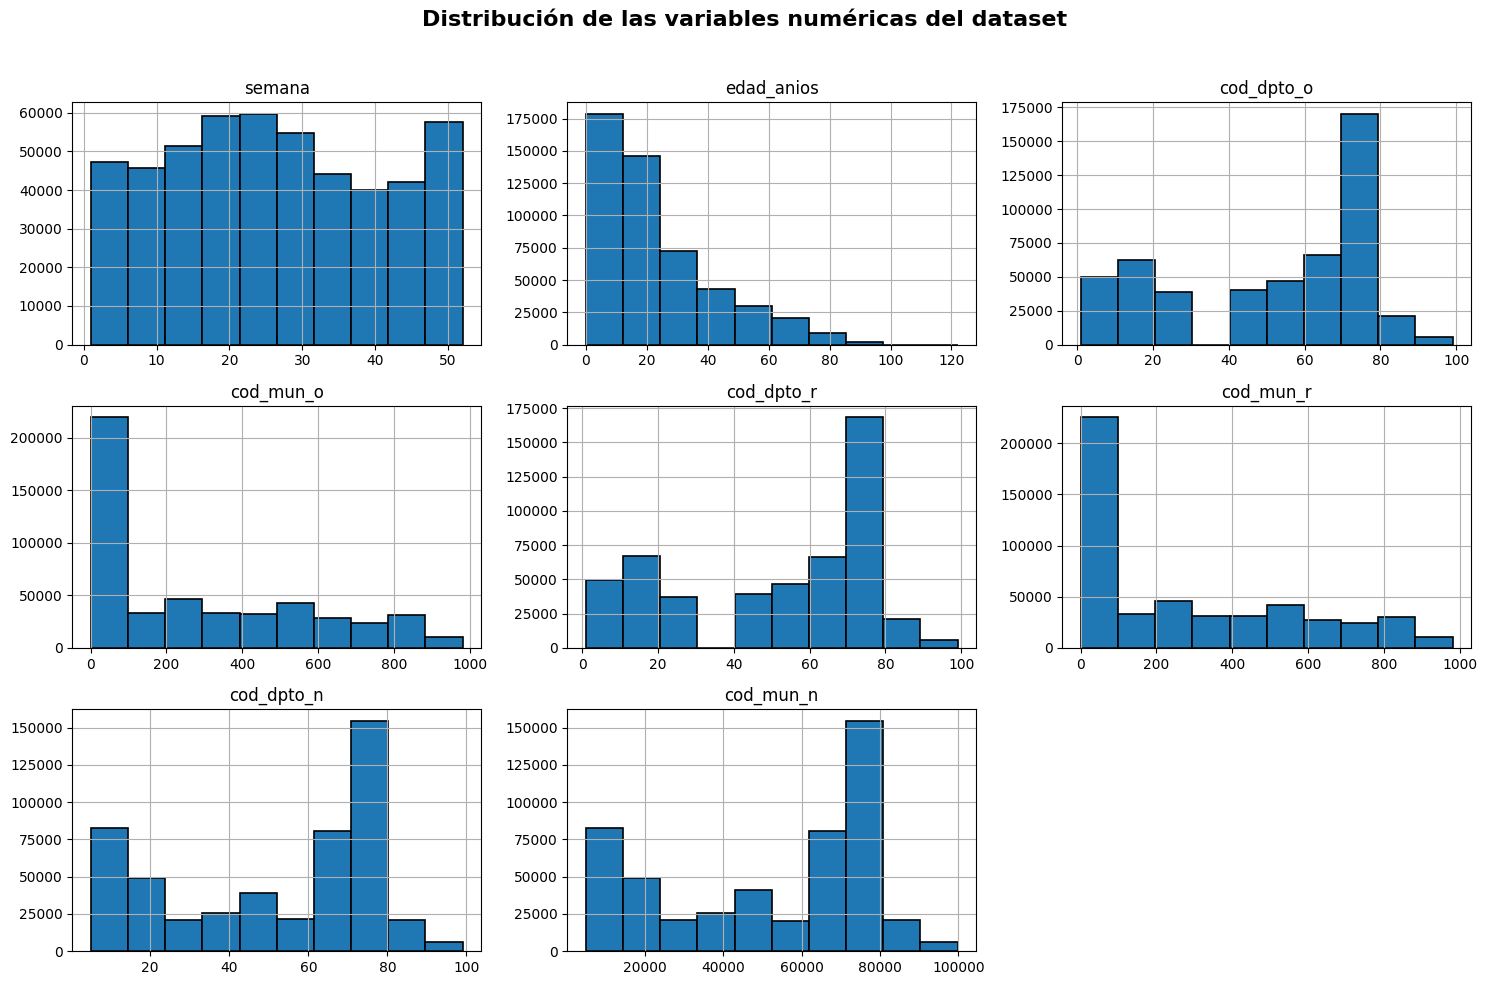

In [13]:
dengue_var_num = ['fec_not', 'semana', 'edad_anios', 'cod_dpto_o', 'cod_mun_o', 'cod_dpto_r', 'cod_mun_r', 'cod_dpto_n', 'cod_mun_n']

import matplotlib.pyplot as plt

# Seleccionar las columnas numéricas del DataFrame
dengue_num = df[dengue_var_num]

dengue_num.hist(
    edgecolor='black',
    linewidth=1.2,
    figsize=(15, 10),
    color='#1f77b4'
)

plt.suptitle('Distribución de las variables numéricas del dataset', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

     


Las variables muestran distribuciones asimétricas y concentraciones marcadas en ciertos rangos, por lo que no siguen una distribución normal. En este caso, es más adecuado usar **Spearman** para estudiar las correlaciones ya que evalúa relaciones monotónicas sin requerir normalidad en los datos.


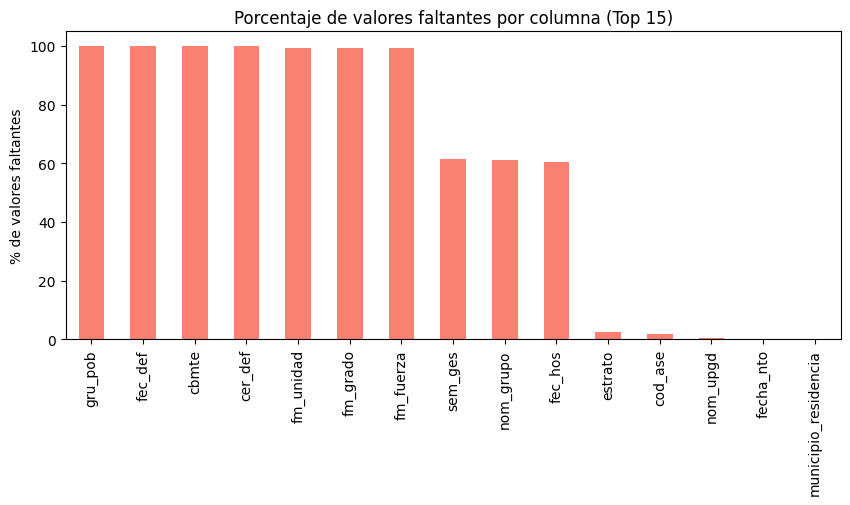

In [14]:
missing = df.isnull().mean().sort_values(ascending=False) * 100

plt.figure(figsize=(10,4))
missing.head(15).plot(kind='bar', color='salmon')
plt.title('Porcentaje de valores faltantes por columna (Top 15)')
plt.ylabel('% de valores faltantes')
plt.xticks(rotation=90)
plt.show()



El gráfico muestra visualmente el porcentaje de valores faltantes en 15 columnas del dataset, confirmando los resultados obtenidos previamente con la función de Python. En otras palabras, este gráfico **refuerza la evidencia sobre la presencia de datos nulos** y nos reafirma la desición de posteriormente en la fase de limpieza eliminar varias columnas y hacer rellenado de datos en las otras.


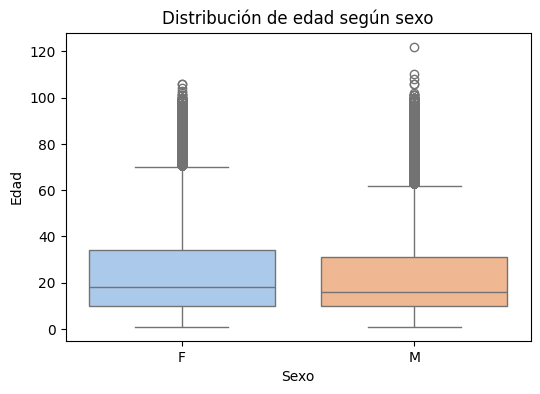

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='sexo', y='edad', palette='pastel')
plt.title('Distribución de edad según sexo')
plt.xlabel('Sexo')
plt.ylabel('Edad')
plt.show()




Este gráfico muestra que tanto en hombres como en mujeres la mayoría de los casos se concentran en edades jóvenes y adultas, con medianas similares. Sin embargo, se observan varios valores atípicos en edades avanzadas, especialmente en mujeres. En general, no hay grandes diferencias entre los dos grupos, lo que indica una distribución de edad bastante parecida por sexo.

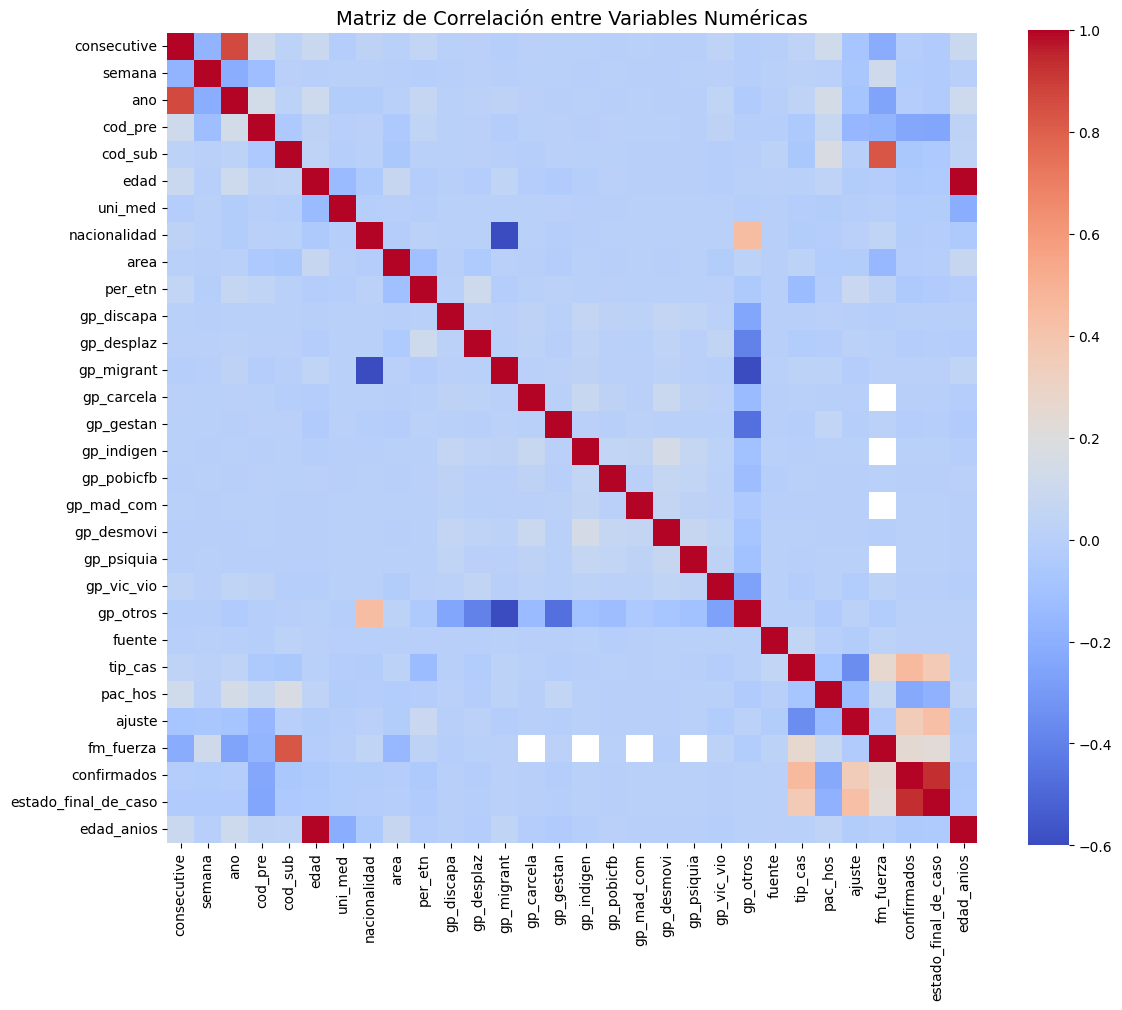

In [16]:
cols_to_drop = [
    'cod_dpto_o', 'cod_mun_o', 'cod_pais_o',
    'cod_dpto_r', 'cod_mun_r', 'cod_pais_r',
    'cod_dpto_n', 'cod_mun_n',
]

numeric_df = df.select_dtypes(include=['number'])

numeric_df = numeric_df.loc[:, numeric_df.nunique() > 1]

numeric_df = numeric_df.drop(columns=[c for c in cols_to_drop if c in numeric_df.columns])

corr = numeric_df.corr(method= "spearman")

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    cmap='coolwarm',      
    square=True,
    cbar=True,
    linewidths=0,         
    vmin=-0.6, vmax=1       
)
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=14)
plt.tight_layout()
plt.show()



La matriz evidencia que la mayoría de las variables numéricas presentan correlaciones bajas entre sí, lo cual sugiere independencia entre los distintos factores analizados. Se observan zonas en azul y rojo muy dispersas, indicando relaciones débiles tanto positivas como negativas. Las correlaciones más altas se concentran en algunas variables relacionadas con la edad y el estado del caso, mientras que el resto mantiene valores cercanos a cero. En conjunto, este patrón sugiere que las variables no siguen una relación lineal fuerte, por lo que es conveniente emplear métodos no paramétricos o basados en correlaciones de rangos para análisis posteriores.

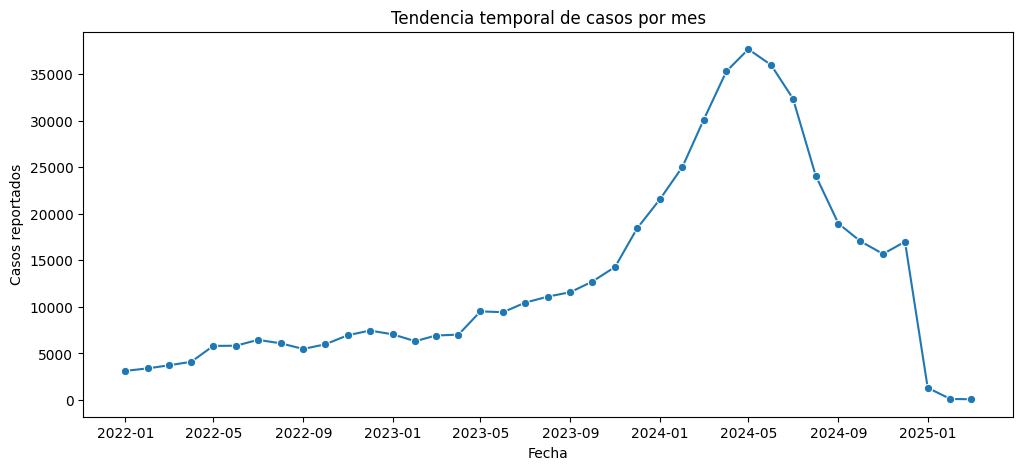

In [17]:
if 'fec_not' in df.columns:
    df['fec_not'] = pd.to_datetime(df['fec_not'], errors='coerce')
    df['year'] = df['fec_not'].dt.year
    df['month'] = df['fec_not'].dt.month

    ts = df.groupby(['year','month']).size().reset_index(name='casos')
    ts['fecha'] = pd.to_datetime(ts['year'].astype(str) + '-' + ts['month'].astype(str) + '-01')

    plt.figure(figsize=(12,5))
    sns.lineplot(data=ts, x='fecha', y='casos', marker='o')
    plt.title('Tendencia temporal de casos por mes')
    plt.xlabel('Fecha')
    plt.ylabel('Casos reportados')
    plt.show()


El gráfico evidencia una tendencia ascendente en los casos reportados desde 2022, con un crecimiento moderado al inicio y un aumento acelerado que alcanza su punto más alto en 2024. Este pico marcado podría estar relacionado con factores ambientales como **el Fenómeno del Niño**, que suele generar condiciones climáticas favorables para la proliferación de vectores transmisores, especialmente en enfermedades como el dengue.

Tras ese punto máximo, se observa una disminución pronunciada hacia finales de 2024 e inicios de 2025, lo que podría reflejar la efectividad de medidas de control, campañas de prevención o el cambio hacia condiciones climáticas menos propicias para la transmisión. En conjunto, el gráfico revela un comportamiento claramente estacional y dependiente de factores climáticos.

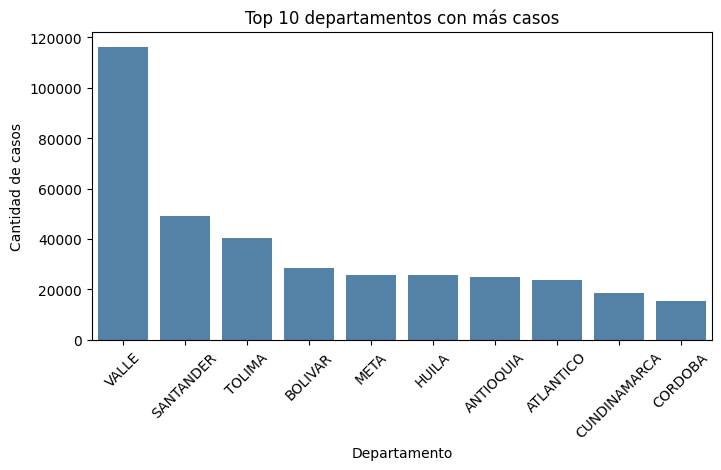

In [18]:
if 'departamento_ocurrencia' in df.columns:
    top_dept = df['departamento_ocurrencia'].value_counts().head(10)
    plt.figure(figsize=(8,4))
    sns.barplot(x=top_dept.index, y=top_dept.values, color='steelblue')
    plt.title('Top 10 departamentos con más casos')
    plt.xlabel('Departamento')
    plt.ylabel('Cantidad de casos')
    plt.xticks(rotation=45)
    plt.show()


El gráfico presenta los diez departamentos de Colombia con mayor número de casos reportados de **dengue**. Se observa una marcada diferencia entre el departamento del **Valle**, que lidera ampliamente con cerca de **120.000 casos**, y el resto de los departamentos. Este valor casi **duplica o triplica** las cifras de los demás, lo que sugiere una situación epidemiológica especialmente crítica en esa región.

En segundo y tercer lugar se encuentran **Santander** y **Tolima**, con valores aproximados de **50.000 y 40.000 casos** respectivamente, lo que indica también una alta incidencia, aunque considerablemente menor en comparación con el Valle. Departamentos como **Bolívar**, **Meta**, **Huila** y **Antioquia** muestran cifras más equilibradas, alrededor de **25.000 casos**, mientras que **Atlántico**, **Cundinamarca** y **Córdoba** completan el top con cantidades ligeramente inferiores.

La distribución del gráfico evidencia una **concentración significativa de casos en unas pocas regiones**, lo que podría estar relacionado con factores climáticos (temperaturas cálidas y humedad), densidad poblacional, y condiciones ambientales favorables para la proliferación del mosquito.

En conclusión, el Valle destaca como el foco principal de contagio, seguido de otros departamentos que, aunque con menos casos, requieren igualmente estrategias de control y prevención continuas para evitar brotes futuros.


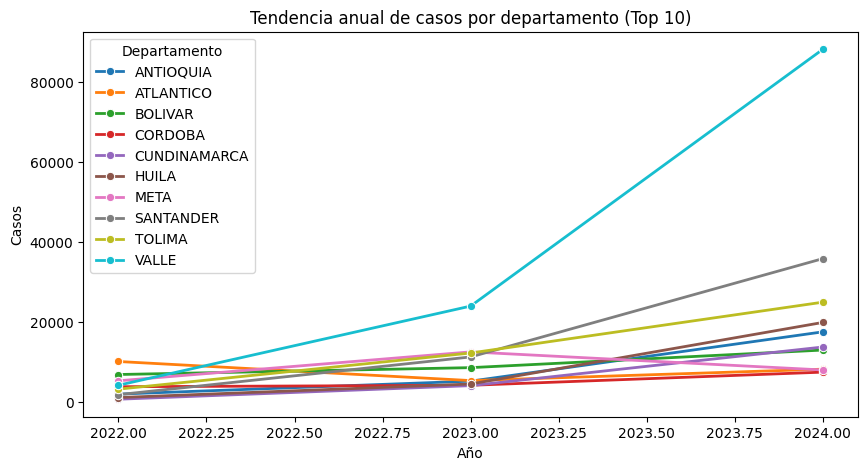

In [19]:
top_dept = df['departamento_ocurrencia'].value_counts().head(10).index
dept_year = (df[df['departamento_ocurrencia'].isin(top_dept)]
             .groupby(['ano','departamento_ocurrencia'])
             .size().reset_index(name='casos'))

plt.figure(figsize=(10,5))
sns.lineplot(data=dept_year, x='ano', y='casos',
             hue='departamento_ocurrencia', marker='o', linewidth=2)
plt.title('Tendencia anual de casos por departamento (Top 10)')
plt.xlabel('Año')
plt.ylabel('Casos')
plt.legend(title='Departamento')
plt.show()


El gráfico muestra la **evolución anual de los casos de dengue** entre los años **2022 y 2024** en los diez departamentos con mayor incidencia en Colombia. A partir de la tendencia observada, se puede apreciar un **aumento generalizado** de los casos en casi todos los departamentos, lo que evidencia un crecimiento sostenido de la enfermedad en el país.

El **departamento del Valle** presenta un comportamiento particularmente alarmante: su curva crece de forma **pronunciada y acelerada**, pasando de cifras moderadas en 2022 a superar los **80.000 casos en 2024**. Esta trayectoria lo posiciona muy por encima del resto, sugiriendo una expansión epidémica.

En conjunto, la gráfica sugiere que el dengue ha mostrado un **incremento sostenido en los últimos años**, especialmente a partir de 2023, con picos que podrían anticipar un comportamiento epidémico.


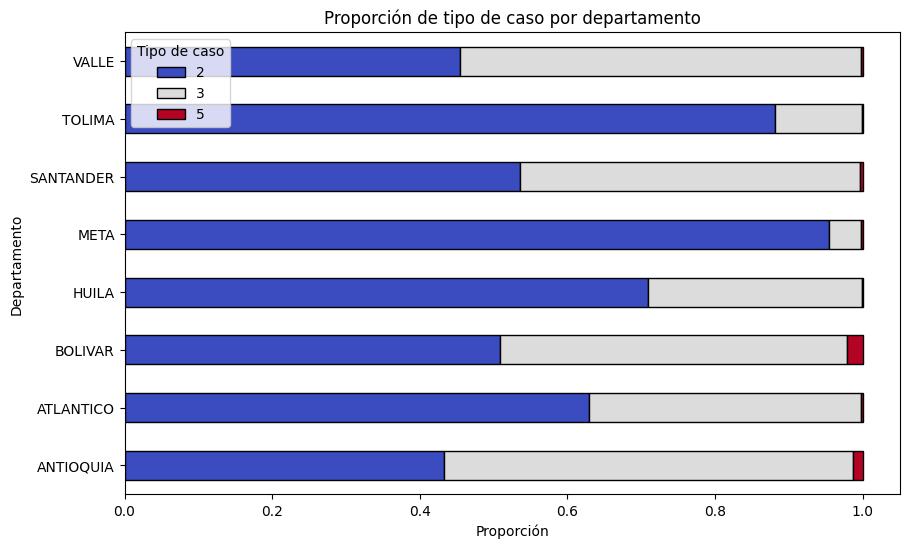

In [20]:
if 'estado_final_de_caso' in df.columns:
    top_dept = df['departamento_ocurrencia'].value_counts().head(8).index
    cross = (df[df['departamento_ocurrencia'].isin(top_dept)]
             .groupby(['departamento_ocurrencia','tip_cas'])
             .size().reset_index(name='n'))
    
    pivot = cross.pivot(index='departamento_ocurrencia',
                        columns='tip_cas',
                        values='n').fillna(0)
    pivot_pct = pivot.div(pivot.sum(axis=1), axis=0)

    pivot_pct.plot(kind='barh', stacked=True, figsize=(10,6),
                   colormap='coolwarm', edgecolor='black')
    plt.title('Proporción de tipo de caso por departamento')
    plt.xlabel('Proporción')
    plt.ylabel('Departamento')
    plt.legend(title='Tipo de caso')
    plt.show()


El gráfico muestra la **distribución proporcional de los tipos de casos de dengue** registrados en los principales departamentos del país. En esta representación, los casos tipo **2 (probables)** están en azul, los **tipo 3 (confirmados por laboratorio)** en gris, y los **tipo 5 (confirmados por nexo epidemiológico)** en rojo.  

De manera general, se observa que en la mayoría de los departamentos predomina la **proporción de casos probables (tipo 2)**, lo cual evidencia que una gran parte de los reportes aún se encuentran en fase de diagnóstico o sin confirmación de laboratorio. Este patrón puede reflejar limitaciones en la capacidad diagnóstica o en el acceso a pruebas confirmatorias en ciertas regiones.  

El **departamento del Meta** destaca con una proporción muy alta de casos probables, superior al 80%, lo que sugiere una **dependencia significativa del diagnóstico clínico inicial** más que de la confirmación de laboratorio. En contraste, departamentos como **Tolima, Huila y Atlántico** presentan una proporción más equilibrada entre casos probables y confirmados, lo que podría indicar una mejor capacidad de verificación diagnóstica o una gestión más robusta de la vigilancia epidemiológica.

Por su parte, los **casos confirmados por nexo epidemiológico (tipo 5)** son mínimos en todos los departamentos, con presencia apenas perceptible en **Bolívar y Santander**, lo que sugiere que esta modalidad de confirmación no es común o solo se aplica en contextos muy específicos.

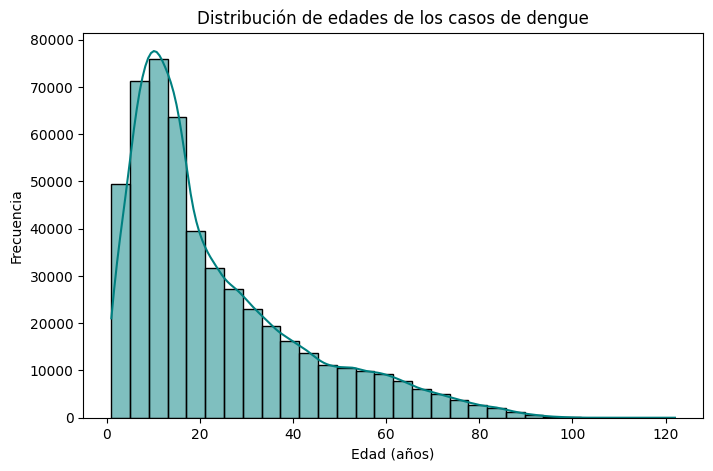

In [21]:
if 'edad' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['edad'], bins=30, kde=True, color='teal')
    plt.title('Distribución de edades de los casos de dengue')
    plt.xlabel('Edad (años)')
    plt.ylabel('Frecuencia')
    plt.show()


El gráfico muestra la **distribución de edades** de los casos reportados de dengue, evidenciando una concentración marcada en los grupos de **niños, adolescentes y adultos jóvenes**. La mayor frecuencia de casos se observa entre los **5 y 20 años de edad**, alcanzando un pico alrededor de los **10 años**, lo que indica que el dengue afecta con mayor intensidad a la población infantil y juvenil.

A medida que aumenta la edad, la frecuencia de casos **disminuye progresivamente**, mostrando una **distribución sesgada hacia la derecha**, característica de enfermedades infecciosas que impactan principalmente a grupos más jóvenes. Este patrón podría estar relacionado con varios factores, como una mayor exposición al vector en entornos escolares y comunitarios, menor inmunidad adquirida, y condiciones socioambientales que favorecen la transmisión en zonas urbanas densamente pobladas.

En los grupos adultos y de mayor edad (mayores de 50 años), la incidencia disminuye considerablemente, aunque aún se observan casos aislados hasta edades superiores a los 80 años. Esto sugiere que, si bien la infección es posible en todas las edades, la **vulnerabilidad y exposición son mayores en los menores de 30 años**.


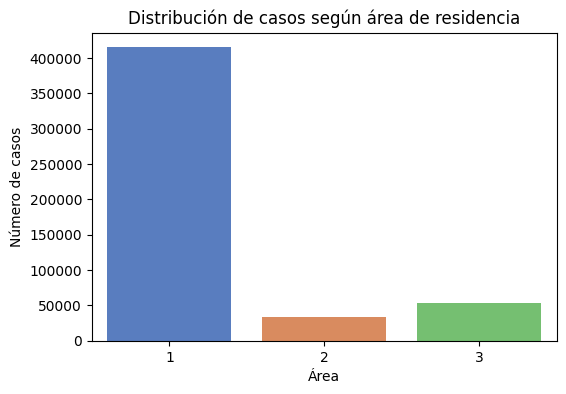

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x='area', data=df, palette='muted')
plt.title('Distribución de casos según área de residencia')
plt.xlabel('Área')
plt.ylabel('Número de casos')
plt.show()


El gráfico muestra la distribución del número de casos de dengue según el **tipo de área de residencia**, clasificadas en:  
1️. Cabecera municipal  
2️. Centro poblado  
3. Rural disperso  

Los resultados evidencian que la **gran mayoría de los casos de dengue se concentran en las cabeceras municipales**, con más de **400.000 casos reportados**, lo que representa una diferencia abrumadora respecto a las demás zonas. Esta tendencia refleja el carácter **predominantemente urbano del dengue**, ya que el mosquito vector se desarrolla más fácilmente en ambientes urbanos donde hay acumulación de agua, alta densidad poblacional y condiciones favorables para su reproducción.

En contraste, los **centros poblados** y las **zonas rurales dispersas** presentan un número significativamente menor de casos, con valores en torno a los **30.000 y 50.000 casos respectivamente**. Esto podría explicarse por una **menor densidad poblacional**, pero también por **subregistro o limitaciones en la vigilancia epidemiológica rural**.


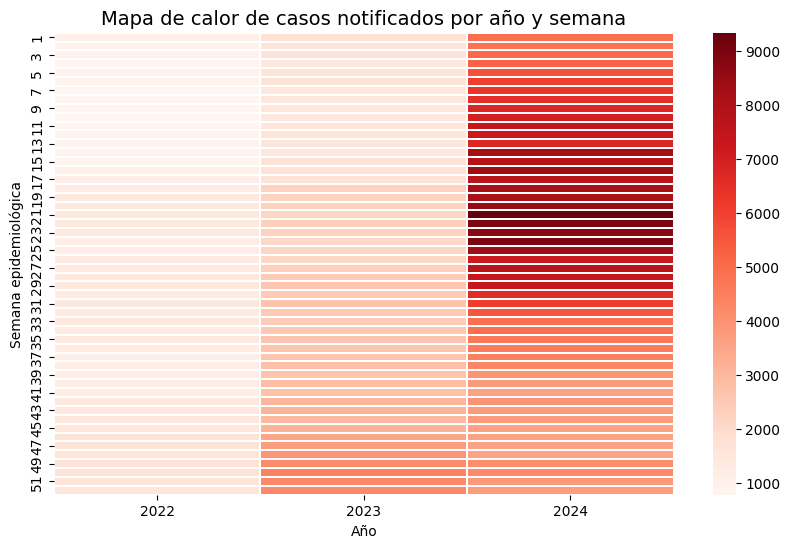

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['ano'] = pd.to_numeric(df['ano'], errors='coerce')
df['semana'] = pd.to_numeric(df['semana'], errors='coerce')

#Agrupar los casos por año y semana
casos_tiempo = df.groupby(['ano', 'semana']).size().reset_index(name='casos')

#Crear una tabla pivote para el mapa de calor
pivot_casos = casos_tiempo.pivot(index='semana', columns='ano', values='casos')

plt.figure(figsize=(10,6))
sns.heatmap(pivot_casos, cmap='Reds', linewidths=0.3)
plt.title('Mapa de calor de casos notificados por año y semana', fontsize=14)
plt.xlabel('Año')
plt.ylabel('Semana epidemiológica')
plt.show()


El gráfico presentado muestra la distribución temporal de los casos notificados de dengue a lo largo de tres años: 2022, 2023 y 2024. Este mapa visualiza la cantidad de casos semanales por cada año y semana epidemiológica, usando colores que varían de blanco a rojo oscuro, donde los colores más intensos representan una mayor cantidad de casos.

**2022:** El año 2022 muestra una tendencia relativamente estable.

**2023:** Se observa un aumento de casos en 2023 en comparación con 2022.

**2024:** En este año, los datos de los primeros meses sugieren un patrón de comportamiento más elevado en las semanas iniciales del año, con los valores alcanzando picos en las semanas 10-15 y un aumento progresivo hacia las semanas finales. Esto podría indicar una tendencia creciente de casos de dengue en este año, posiblemente debido a condiciones ambientales que favorecen la proliferación del mosquito.

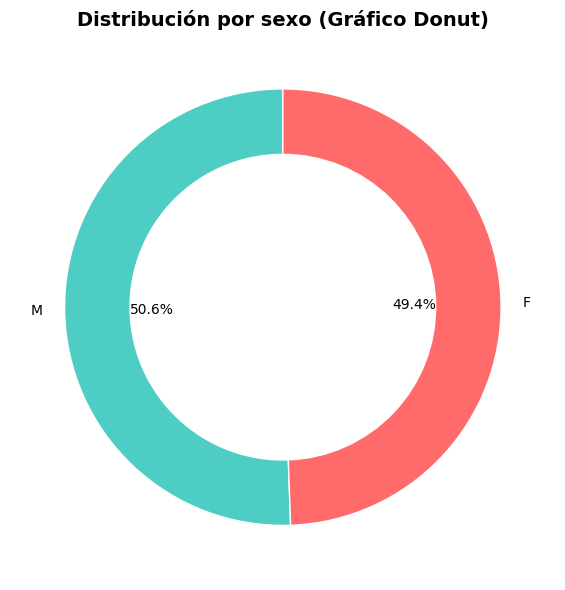

In [24]:
valores = df['sexo'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(valores, labels=valores.index, autopct='%1.1f%%', startangle=90,
        colors=['#4ECDC4','#FF6B6B'], wedgeprops={'width':0.3, 'edgecolor':'white'})
plt.title('Distribución por sexo (Gráfico Donut)', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()




El gráfico tipo donut muestra una distribución casi equilibrada entre hombres y mujeres, con una ligera mayoría del sexo **masculino (50.6%)** frente al **femenino (49.4%)**. Esta diferencia mínima sugiere que ambos sexos se ven prácticamente igual de afectados, lo que indica que la variable sexo no representa un factor determinante en la incidencia general de los casos del dataset.

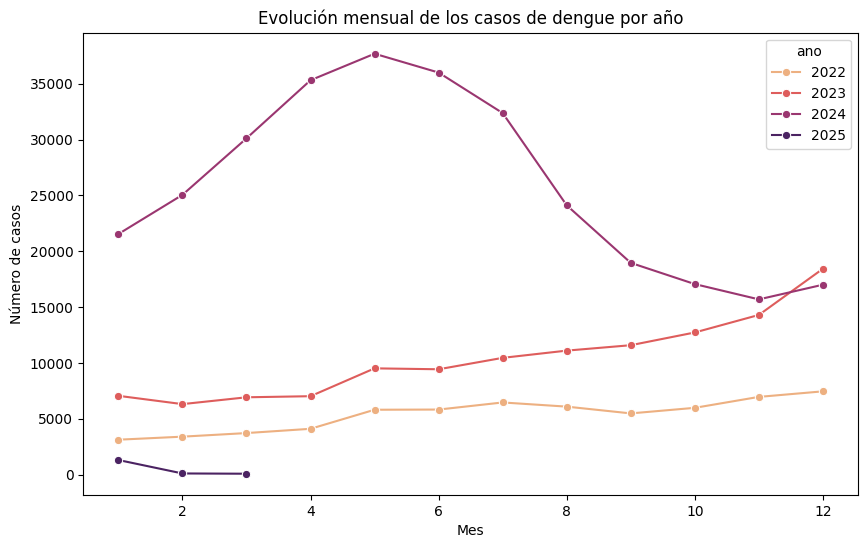

In [25]:
df['fec_not'] = pd.to_datetime(df['fec_not'], errors='coerce')
df['mes'] = df['fec_not'].dt.month
df['ano'] = df['fec_not'].dt.year

casos_mes = df.groupby(['ano','mes']).size().reset_index(name='casos')

plt.figure(figsize=(10,6))
sns.lineplot(data=casos_mes, x='mes', y='casos', hue='ano', marker='o', palette='flare')
plt.title('Evolución mensual de los casos de dengue por año')
plt.xlabel('Mes')
plt.ylabel('Número de casos')
plt.show()


El gráfico muestra la evolución mensual de los casos de dengue entre 2022 y 2024, con algunos datos de 2025. Aunque el análisis se centrará en los datos de 2022 a 2024, se puede observar que el dataset contiene información de 2025. Estos datos no serán eliminados, ya que serán útiles más adelante para comparar con las predicciones que genere el modelo.

1. **Tendencia General**: En 2024, los casos de dengue muestran un incremento significativo a lo largo del año, alcanzando su punto máximo en los meses de mayo a septiembre. Este año presenta la mayor cantidad de casos, seguida de 2023, que muestra un patrón similar, aunque con números más bajos. En 2022, los casos son considerablemente más bajos durante todo el año, con picos más moderados en la misma temporada.

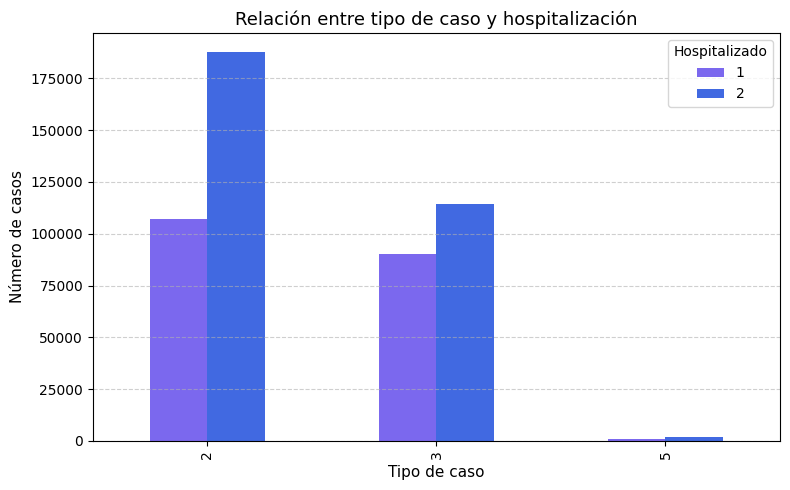

In [26]:
tabla = pd.crosstab(df['tip_cas'], df['pac_hos'])

colores = ["#7B68EE", "#4169E1"]

tabla.plot(kind='bar', figsize=(8,5), color=colores)
plt.title('Relación entre tipo de caso y hospitalización', fontsize=13)
plt.xlabel('Tipo de caso', fontsize=11)
plt.ylabel('Número de casos', fontsize=11)
plt.legend(title='Hospitalizado')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



El gráfico muestra la relación entre el tipo de caso de dengue y la hospitalización, comparando los casos hospitalizados (tipo 1) y no hospitalizados (tipo 2). Los tipos de caso están clasificados de la siguiente manera:  
2 = Probable, 3 = Confirmado por laboratorio, 5 = Confirmado por nexo epidemiológico.

1. **Distribución General**:
   - Los casos **probables** y **confirmados por laboratorio** tienen el mayor número de casos en comparación con los casos confirmados por nexo epidemológico.
   - La diferencia entre hospitalizados y no hospitalizados es mucho más notable en los casos probables y los casos confirmados por laboratorio, donde los casos no hospitalizados superan ampliamente a los hospitalizados.



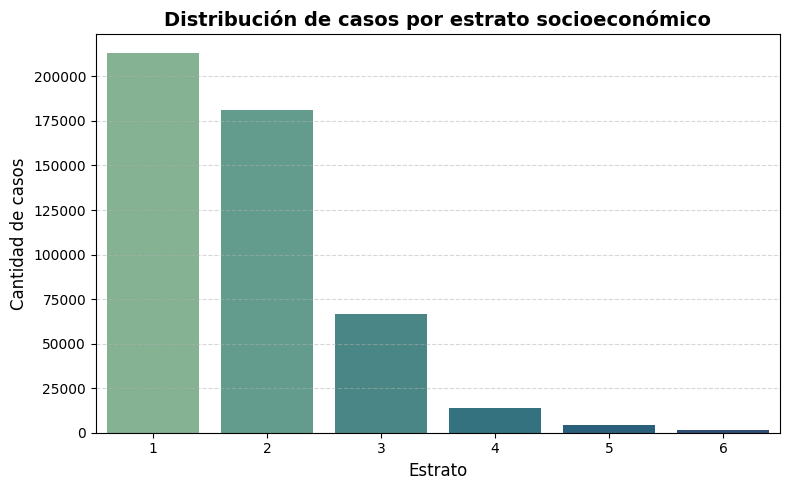

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


# limpieza necesaria para que la gráfica se vea bien
# Asegurar que 'estrato' sea numérica entera
df['estrato'] = pd.to_numeric(df['estrato'], errors='coerce').astype('Int64')

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='estrato', palette='crest')

plt.title("Distribución de casos por estrato socioeconómico", fontsize=14, weight='bold')
plt.xlabel("Estrato", fontsize=12)
plt.ylabel("Cantidad de casos", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


El gráfico presentado muestra la **distribución de casos de dengue según el estrato socioeconómico** de la población afectada. En el eje horizontal se representan los **estratos (1 a 6)**, mientras que en el eje vertical se observa la **cantidad de casos reportados**.
Existe una **relación inversa entre el nivel socioeconómico y la incidencia del dengue**. Es decir, los estratos más bajos presentan una mayor vulnerabilidad frente a esta enfermedad, mientras que los más altos registran una incidencia muy reducida.
Se puede observar que el **estrato 1** concentra la mayor cantidad de casos, con un valor cercano a los **230.000 casos**, seguido del **estrato 2** con aproximadamente **180.000 casos**. 
Este patrón puede explicarse por **factores sociales y ambientales** relacionados con las condiciones de vida:
- En los estratos más bajos suelen presentarse **deficiencias en el acceso a servicios básicos** como agua potable, recolección de basuras y alcantarillado, lo que favorece la proliferación del mosquito transmisor.  
- Por el contrario, los estratos altos cuentan con **mayores condiciones de salubridad y control ambiental**, reduciendo las posibilidades de transmisión del virus.


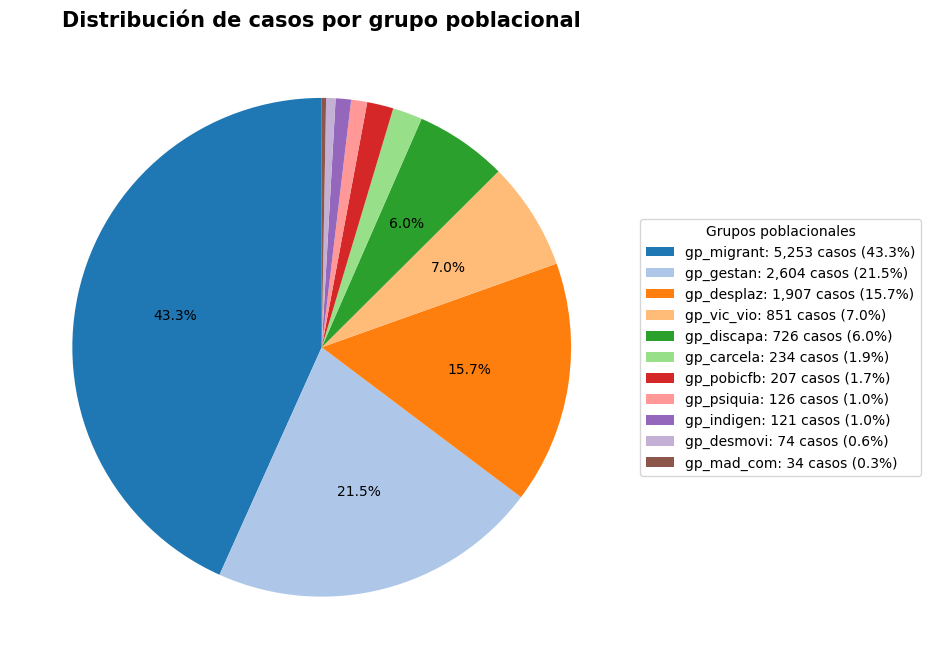

In [28]:
cols_gp = ['gp_discapa', 'gp_desplaz', 'gp_migrant', 'gp_carcela',
           'gp_gestan',  'gp_indigen', 'gp_pobicfb',
           'gp_mad_com', 'gp_desmovi', 'gp_psiquia', 'gp_vic_vio']

#Contar solo los casos donde el valor = 1
casos_gp = (df[cols_gp] == 1).sum().sort_values(ascending=False)
casos_gp = casos_gp[casos_gp > 0]

#Calcular porcentajes
porcentajes = (casos_gp / casos_gp.sum()) * 100

plt.figure(figsize=(9, 8))
colors = plt.cm.tab20(range(len(casos_gp))) 

def autopct_format(pct):
    return ('%1.1f%%' % pct) if pct > 2 else ''

wedges, texts, autotexts = plt.pie(
    casos_gp.values,
    labels=None,
    autopct=autopct_format,
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10}
)

plt.title('Distribución de casos por grupo poblacional', fontsize=15, weight='bold')


labels = [f"{g}: {v:,} casos ({p:.1f}%)" for g, v, p in zip(casos_gp.index, casos_gp.values, porcentajes)]
plt.legend(wedges, labels, title="Grupos poblacionales", loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()




El gráfico circular muestra la **distribución porcentual de los casos de dengue según el grupo poblacional**. Cada sector del gráfico representa la proporción de casos dentro de un grupo específico.

El grupo **migrante** concentra el **43,3% de los casos**, siendo el más afectado con **5.253 casos reportados**.  
Esto sugiere que las poblaciones en condición de migración presentan una **mayor vulnerabilidad frente al dengue**, posiblemente por condiciones precarias de vivienda, hacinamiento o falta de acceso a servicios de salud.
Otros grupos que según el gráfico también están en alto riesgo son: 
- **Gestantes (gp_gestan)** representan el **21,5%** de los casos (**2.604** en total).  
- **Desplazados (gp_desplaz)** agrupan el **15,7%** (**1.907 casos**).  
Estos dos grupos también son poblaciones vulnerables, ya que enfrentan limitaciones en la atención médica y exposición a ambientes con alto riesgo de proliferación del mosquito.


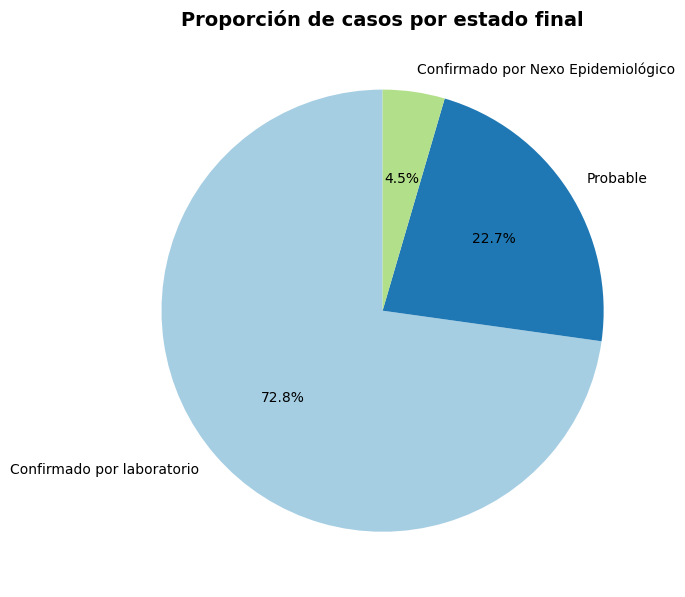

In [29]:
estados = df['nom_est_f_caso'].value_counts()
plt.figure(figsize=(7,7))
colors = plt.cm.Paired(range(len(estados)))
plt.pie(estados, labels=estados.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Proporción de casos por estado final', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


El gráfico de pastel muestra la **distribución porcentual de los casos de dengue según su estado final de confirmación**, es decir, la forma en que fueron verificados o clasificados los casos dentro del sistema de vigilancia epidemiológica.
Se puede observar que el **72.8% de los casos** fueron **confirmados por laboratorio**, lo que representa la **mayor proporción** del total. Este dato indica que la mayoría de los diagnósticos se realizaron mediante **pruebas clínicas o serológicas**, lo cual garantiza un **alto nivel de certeza** en la identificación del virus.
El **22.7%** corresponde a **casos probables**, es decir, aquellos en los que se sospecha de dengue por los síntomas clínicos y antecedentes epidemiológicos, pero **sin confirmación de laboratorio**.  
Estos casos suelen presentarse en zonas con alta incidencia del virus, donde no siempre se dispone de pruebas diagnósticas inmediatas y el **4.5%** de los casos fueron **confirmados por nexo epidemiológico**, lo que implica que el diagnóstico se estableció con base en la **relación directa con un caso confirmado**, sin realizar pruebas de laboratorio, este método se usa generalmente cuando hay **brotes comunitarios** o limitaciones en recursos diagnósticos.

## **2. Diseño de experimentos y recolección de resultados**

En esta sección se describirán las estrategias utilizadas para preparar el conjunto de datos de acuerdo con las necesidades del análisis y los modelos que se aplicarán posteriormente.  
Las decisiones que se tomarán están fundamentadas en los hallazgos obtenidos durante la inspección y exploración del dataset.

### **2.1 Normalización de los nombres de las columnas**

Durante la fase de inspección del conjunto de datos se identificó que los nombres de las columnas no seguían un formato uniforme: algunas estaban escritas en **mayúsculas**, otras en **minúsculas**.  
Por esta razón, se decidió **normalizar los nombres de todas las columnas**, convirtiéndolos a **minúsculas**
De esta manera se logró un formato estándar, más legible y adecuado para los procesos de análisis y modelado posteriores.


### **2.2 Eliminar columnas técnicas, columnas con valores constantes y las que tienen muchos valores faltantes**
En está sección se eliminaron las columnas que en la fase de inspección se identificaron con más del 50% datos nulos, las que se identificaron con valores constantes en todos los registros y aquellas que son columnas técnicas que no aportan información relevante. 

In [30]:
cols_to_drop = [
    'gru_pob', 'fec_def', 'cer_def', 'cbmte',
    'fm_fuerza', 'fm_unidad', 'fm_grado',
    'fec_hos', 'sem_ges', 'nom_grupo',
    'consecutive', 'cod_pre', 'cod_ase',
    'fec_arc_xl', 'fec_aju', 'cod_eve',
    'con_fin', 'va_sispro', 'nombre_evento'
]

df = df.drop(columns=cols_to_drop)
print("Columnas eliminadas correctamente.")
df.columns

Columnas eliminadas correctamente.


Index(['fec_not', 'semana', 'ano', 'cod_sub', 'edad', 'uni_med',
       'nacionalidad', 'nombre_nacionalidad', 'sexo', 'cod_pais_o',
       'cod_dpto_o', 'cod_mun_o', 'area', 'ocupacion', 'tip_ss', 'per_etn',
       'estrato', 'gp_discapa', 'gp_desplaz', 'gp_migrant', 'gp_carcela',
       'gp_gestan', 'gp_indigen', 'gp_pobicfb', 'gp_mad_com', 'gp_desmovi',
       'gp_psiquia', 'gp_vic_vio', 'gp_otros', 'fuente', 'cod_pais_r',
       'cod_dpto_r', 'cod_mun_r', 'cod_dpto_n', 'cod_mun_n', 'fec_con',
       'ini_sin', 'tip_cas', 'pac_hos', 'ajuste', 'fecha_nto', 'confirmados',
       'estado_final_de_caso', 'nom_est_f_caso', 'nom_upgd', 'pais_ocurrencia',
       'departamento_ocurrencia', 'municipio_ocurrencia', 'pais_residencia',
       'departamento_residencia', 'municipio_residencia',
       'departamento_notificacion', 'municipio_notificacion', 'edad_anios',
       'year', 'month', 'mes'],
      dtype='object')

In [31]:
# Verificando que se eliminaron las columnas correctamente
len(df.columns)

57

### **2.3 Rellenado de columnas faltantes**

En esta etapa se abordó el tratamiento de las columnas que se identificaron en la fase de inspección de los datos que presentaban valores nulos siempre y cuando estos no superaran el 50% de los registros. Las variables con datos faltantes que cumplían esa condición fueron: **estrato (13.144 nulos)**, **fec_con (1 nulo)**, **fecha_nto (306 nulos)**, **nom_upgd (3.059 nulos)** y **municipio_residencia (2 nulos)**.  

Las columnas de tipo categórico o numérico, como *estrato*, *fec_con*, *fecha_nto* y *municipio_residencia*, fueron completadas utilizando la **moda global de cada columna**.  

En el caso particular de *nom_upgd*, el procedimiento fue diferente, ya que su valor depende del **departamento de residencia**. Para cada registro con dato faltante, se identificó la **moda de `nom_upgd` dentro del mismo departamento** y se utilizó ese valor como reemplazo. En los casos en que no fue posible obtener una moda local, se empleó la **moda global de la columna** como valor de respaldo.


In [32]:
#Mostrar columnas con valores nulos 
print("Columnas con valores nulos antes de rellenar datos :")
print(df.isna().sum()[df.isna().sum() > 0])
print("\n")

#Rellenar columnas de fechas con la moda
fechas = ['fec_con', 'fecha_nto']
for col in fechas:
    moda_fecha = df[col].mode()[0]
    df[col] = df[col].fillna(moda_fecha)
    print(f"Rellenado {col} con su moda: {moda_fecha}")

#Rellenar municipio_residencia con su moda global
moda_municipio = df['municipio_residencia'].mode()[0]
df['municipio_residencia'] = df['municipio_residencia'].fillna(moda_municipio)
print(f"Rellenado municipio_residencia con moda global: {moda_municipio}")

#Rellenar estrato (numérica) con su moda
moda_estrato = df['estrato'].mode()[0]
df['estrato'] = df['estrato'].fillna(moda_estrato)
print(f"Rellenado estrato con moda: {moda_estrato}")

#Rellenar nom_upgd según el departamento_residencia
moda_global_upgd = df['nom_upgd'].mode()[0]

#Filas donde falta nom_upgd
faltantes = df['nom_upgd'].isna()

#Iterar por cada departamento donde hay faltantes
for depto in df.loc[faltantes, 'departamento_residencia'].unique():
    #Calcular la moda de nom_upgd dentro de ese departamento
    moda_depto = (
        df.loc[df['departamento_residencia'] == depto, 'nom_upgd']
        .mode()
    )
    if len(moda_depto) > 0:
        df.loc[
            (df['departamento_residencia'] == depto) & (faltantes),
            'nom_upgd'
        ] = moda_depto[0]

#Si aún quedan valores nulos, rellenarlos con la moda global
df['nom_upgd'] = df['nom_upgd'].fillna(moda_global_upgd)
print(f"Rellenado nom_upgd según departamento o con moda global: {moda_global_upgd}")



Columnas con valores nulos antes de rellenar datos :
estrato                 21661
fec_con                     1
fecha_nto                 306
nom_upgd                 3059
municipio_residencia        2
dtype: int64


Rellenado fec_con con su moda: 2024-06-11
Rellenado fecha_nto con su moda: 2012-09-13
Rellenado municipio_residencia con moda global: CALI
Rellenado estrato con moda: 1
Rellenado nom_upgd según departamento o con moda global: FUNDACION CLINICA INFANTIL CLUB NOEL


### **2.4 Agregar una nueva columna agregada (edad en años)**

Durante la fase de inspección se identificó que el dataset contenía dos columnas relacionadas con la edad: una con el valor numérico y otra con la unidad de medida (0 = No aplica, 1 = Años, 2 = Meses, 3 = Días, 4 = Horas). Por ello, se creó una nueva columna llamada “edad_en_años”, que convierte todos los valores a años para estandarizar la información y facilitar los análisis posteriores.

### **2.5 Solución de tipos de datos mixtos en algunas columnas**

Durante la fase de inspección se identificaron varias columnas con tipos de datos mixtos, entre las cuales se encontraban: **OCUPACION**, **COD_ASE**, **nom_grupo**, **estrato**, **sem_ges**, **FEC_CON**, **FEC_HOS**, **FECHA_NTO**, **FM_UNIDAD**, **FM_GRADO**, **Nom_upgd** y **Municipio_residencia**.  

Sin embargo, la mayoría de estas variables fueron **eliminadas** debido a que presentaban una **alta proporción de datos nulos**, correspondían a **variables técnicas** sin relevancia analítica o eran **variables constantes** que no aportaban información significativa al análisis.  

Por tanto, únicamente se conservaron y transformaron las siguientes columnas, asignándoles el tipo de dato adecuado:  

- **OCUPACION:** numérica  
- **estrato:** numérica  
- **FEC_CON:** datetime  
- **FECHA_NTO:** datetime  
- **Nom_upgd:** object  
- **Municipio_residencia:** object  

De esta forma, se garantizó la coherencia de los tipos de datos en el conjunto de información, facilitando los procesos posteriores de análisis y modelado.


In [33]:
#OCUPACION y ESTRATO → numéricas (int)
df["ocupacion"] = pd.to_numeric(df["ocupacion"], errors="coerce")
df["estrato"] = pd.to_numeric(df["estrato"], errors="coerce")

#FEC_CON y FECHA_NTO → fechas (datetime)
df["fec_con"] = pd.to_datetime(df["fec_con"], errors="coerce")
df["fecha_nto"] = pd.to_datetime(df["fecha_nto"], errors="coerce")

#NOM_UPGD y MUNICIPIO_RESIDENCIA → categóricas (object)
df["nom_upgd"] = df["nom_upgd"].astype("object")
df["municipio_residencia"] = df["municipio_residencia"].astype("object")

#Verificación final
print("\nTipos de datos finales:")
print(df[["ocupacion", "estrato", "fec_con", "fecha_nto", "nom_upgd", "municipio_residencia"]].dtypes)




Tipos de datos finales:
ocupacion                      float64
estrato                          Int64
fec_con                 datetime64[ns]
fecha_nto               datetime64[ns]
nom_upgd                        object
municipio_residencia            object
dtype: object


In [34]:
for col in df.columns:
    tipos = df[col].apply(type).nunique()
    if tipos > 1:
        print(f"La columna '{col}' tiene tipos de datos mixtos.")
else:
    print("No hay columnas con tipos de datos mixtos")


No hay columnas con tipos de datos mixtos


### **2.6 Guardar dataset limpio**


In [35]:
df.to_csv("./data/dataset_limpio.csv", index=False)

### **2.7 Crear serie de tiempo (Agrupando por días)**
En esta etapa se construyó una serie de tiempo diaria con el fin de analizar la evolución temporal de los casos confirmados de dengue y preparar los datos para un futuro modelo de predicción.

Primero, se convirtió la columna fec_not al formato de fecha (datetime), garantizando la correcta interpretación cronológica de los registros. Luego, se filtraron únicamente los casos confirmados, ya que son los que reflejan con mayor precisión la dinámica real de la enfermedad en la población.

Posteriormente, los datos se agruparon por día, obteniendo así el número total de casos confirmados reportados para cada fecha. Este proceso generó un nuevo DataFrame (df_diario) con dos columnas principales:

**fecha**: representa la fecha exacta de notificación.
**casos_confirmados**: contiene el total de casos confirmados en ese día.

La decisión de trabajar con datos diarios se basó en la cantidad y riqueza de información disponible. Si se hubiera trabajado por semanas, solo se contarían con 156 observaciones; en cambio, al usar los datos diarios se obtuvieron 1.095 registros, lo que permite un análisis más detallado de la variabilidad temporal.

Desde una perspectiva epidemiológica, contar con una serie diaria resulta especialmente útil, ya que permite:

1. Detectar con mayor rapidez brotes o incrementos inusuales en los casos.
2. Analizar la efectividad de intervenciones sanitarias casi en tiempo real.
3. Observar con más precisión los patrones estacionales o picos epidémicos.


En conjunto, esta serie diaria proporciona una visión más completa y sensible del comportamiento del dengue en el tiempo, sirviendo como base sólida para análisis y modelos predictivos más precisos.

In [36]:
# Asegurarte de que la fecha esté en formato datetime
df["fec_not"] = pd.to_datetime(df["fec_not"], errors="coerce")

# Filtrar solo casos confirmados
df_confirmados = df[df["confirmados"] == 1].copy()

# Agrupar por día y contar los casos confirmados
df_diario = (
    df_confirmados.resample("D", on="fec_not")
    .size()
    .reset_index(name="casos_confirmados")
)

# Renombrar columna de fecha
df_diario.rename(columns={"fec_not": "fecha"}, inplace=True)

# Filtrar años
df_2022_2024 = df_diario[df_diario["fecha"].dt.year.isin([2022, 2023, 2024])].copy()
df_2025 = df_diario[df_diario["fecha"].dt.year == 2025].copy()

print(f"Dataset de 2022_2024 tiene {len(df_2022_2024)} registros")
print(f"Rango de fechas: {df_2022_2024['fecha'].min().date()} a {df_2022_2024['fecha'].max().date()}")
print(f"Dataset de 2025 tiene {len(df_2025)} registros")
print(f"Rango de fechas: {df_2025['fecha'].min().date()} a {df_2025['fecha'].max().date()}")


Dataset de 2022_2024 tiene 1095 registros
Rango de fechas: 2022-01-02 a 2024-12-31
Dataset de 2025 tiene 88 registros
Rango de fechas: 2025-01-01 a 2025-03-29


In [37]:
# Visualización del df de casos diarios
df_2022_2024

,fecha,casos_confirmados
0,2022-01-02,8
1,2022-01-03,10
2,2022-01-04,27
3,2022-01-05,33
4,2022-01-06,56
...,...,...
1090,2024-12-27,552
1091,2024-12-28,483
1092,2024-12-29,253
1093,2024-12-30,433


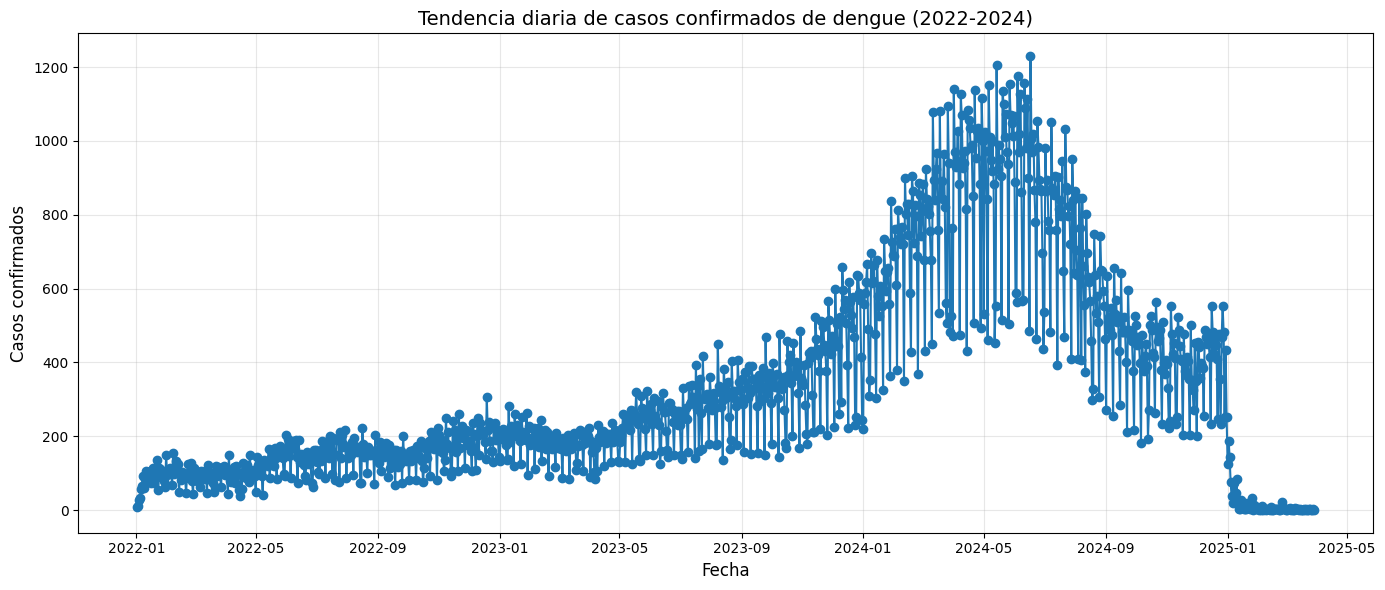

In [38]:
### Gráfica de la tendencia diaria de casos confirmados de dengue (2022-2024)
plt.figure(figsize=(14,6))
plt.plot(df_diario["fecha"], df_diario["casos_confirmados"], marker="o", linestyle="-")

plt.title("Tendencia diaria de casos confirmados de dengue (2022-2024)", fontsize=14)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Casos confirmados", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Aplicamos una media móvil de 7 días con el objetivo de suavizar las fluctuaciones diarias y reducir el ruido aleatorio presente en la serie de tiempo, manteniendo al mismo tiempo la tendencia general del comportamiento de los casos confirmados. Este enfoque permite observar con mayor claridad los patrones subyacentes —como incrementos o descensos sostenidos— que podrían quedar ocultos por variaciones bruscas de un solo día, las cuales muchas veces se deben a retrasos en los reportes o factores administrativos.

La elección de una ventana de 7 días se basa en el carácter epidemiológico y operativo semanal de la vigilancia sanitaria: muchas enfermedades infecciosas, incluido el dengue, muestran dinámicas que se interpretan más claramente en intervalos semanales. Además, se rellenaron los valores faltantes generados por los bordes de la ventana mediante interpolación hacia adelante y hacia atrás (bfill y ffill), asegurando la continuidad temporal de los datos sin introducir sesgos significativos en el análisis.

In [39]:
# Aplica una media móvil de 7 días
df_2022_2024['casos_suavizados'] = df_2022_2024['casos_confirmados'].rolling(window=7, center=True).mean()

# Rellena los primeros y últimos valores perdidos (por la ventana)
df_2022_2024['casos_suavizados'] = df_2022_2024['casos_suavizados'].bfill().ffill()


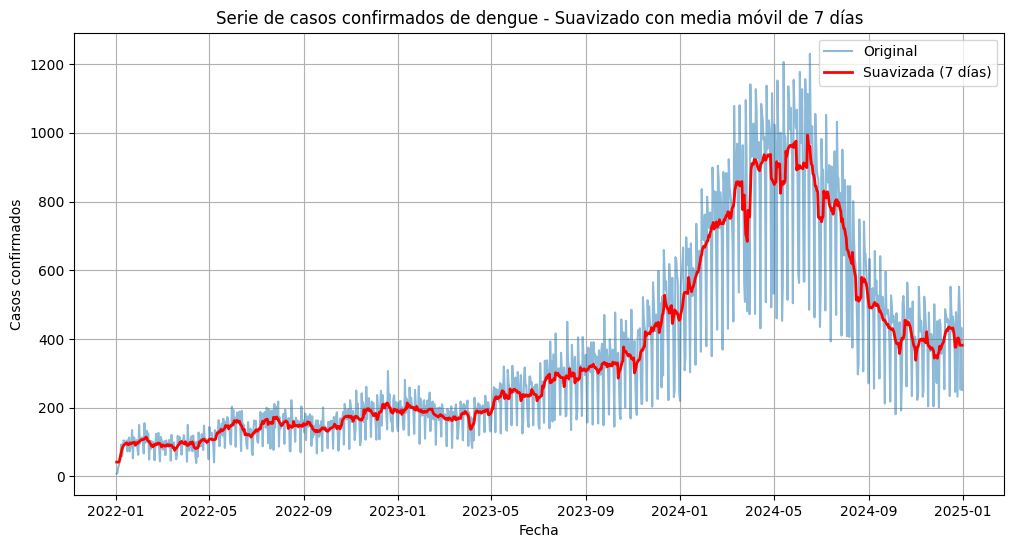

In [40]:
# Visualizar la serie original y la suavizada
plt.figure(figsize=(12,6))
plt.plot(df_2022_2024['fecha'], df_2022_2024['casos_confirmados'], label='Original', alpha=0.5)
plt.plot(df_2022_2024['fecha'], df_2022_2024['casos_suavizados'], label='Suavizada (7 días)', color='red', linewidth=2)
plt.title('Serie de casos confirmados de dengue - Suavizado con media móvil de 7 días')
plt.xlabel('Fecha')
plt.ylabel('Casos confirmados')
plt.legend()
plt.grid(True)
plt.show()


## **3. Descripción de experimentos realizados**

### **Preparación de características temporales**

Con el propósito de enriquecer el conjunto de datos y mejorar la capacidad predictiva del modelo, se agregaron características temporales derivadas de la columna de fechas. Estas variables permiten capturar patrones estacionales y comportamientos asociados a los días, semanas y meses del año, que pueden influir en la incidencia del dengue.
Primero, se estableció la columna fecha como índice del DataFrame y se ordenaron los registros cronológicamente. Luego, se añadieron las siguientes columnas:

1. **day_of_week:** día de la semana (0 = lunes, 6 = domingo).
2. **is_weekend:** indicador binario (1 si es sábado o domingo, 0 en caso contrario).
3. **day_of_year:** número de día dentro del año (1–365).
4. **month:** número de mes (1–12).
5. **week_of_year:** número de semana del año.


In [41]:
# Crear variables de fecha adicionales
df_2022_2024 = df_2022_2024.set_index("fecha").sort_index()

df_2022_2024["day_of_week"] = df_2022_2024.index.dayofweek
df_2022_2024["is_weekend"] = df_2022_2024["day_of_week"].isin([5, 6]).astype(int)
df_2022_2024["day_of_year"] = df_2022_2024.index.dayofyear
df_2022_2024["month"] = df_2022_2024.index.month
df_2022_2024["week_of_year"] = df_2022_2024.index.isocalendar().week.astype(int)


In [42]:
# visualizar df con las nuevas columnas agregadas
df_2022_2024

,casos_confirmados,casos_suavizados,day_of_week,is_weekend,day_of_year,month,week_of_year
fecha,,,,,,,
2022-01-02,8,41.857143,6,1,2,1,52
2022-01-03,10,41.857143,0,0,3,1,1
2022-01-04,27,41.857143,1,0,4,1,1
2022-01-05,33,41.857143,2,0,5,1,1
2022-01-06,56,49.142857,3,0,6,1,1
...,...,...,...,...,...,...,...
2024-12-27,552,396.714286,4,0,362,12,52
2024-12-28,483,381.857143,5,1,363,12,52
2024-12-29,253,381.857143,6,1,364,12,52


Se definió la siguiente función, la cual genera nuevas variables a partir del comportamiento histórico de los casos confirmados. Esta función permite incorporar memoria temporal al modelo mediante las siguientes operaciones:

- **Lags:** Creación de variables rezagadas (casos_lag_n) que representan el número de casos de los días anteriores.

- **Rolling mean y std:** Cálculo de la media y desviación estándar móviles con una ventana definida (ventana_rolling), lo cual suaviza las fluctuaciones diarias y resalta tendencias.

- **Delta y aceleración:** Diferencias entre valores consecutivos para capturar cambios abruptos o aceleraciones en los casos reportados.

En este caso, se utilizó un rezago de 7 días (n_lags=7) y una ventana de suavizado de 7 días, lo cual permite al modelo considerar el comportamiento de la última semana para predecir los casos siguientes.

In [43]:
# Función para crear características temporales
def crear_caracteristicas_temporales(df, n_lags, ventana_rolling):
    df = df.copy()

    base_col = 'casos_suavizados'  

    if base_col not in df.columns:
        raise KeyError(f"Falta la columna '{base_col}' en el DataFrame")

    col_temporales = [
        "day_of_week", "day_of_year", "month", "week_of_year", "is_weekend"
    ]

    for col in col_temporales:
        if col in df.columns:
            df[col] = df[col].shift(1)
        else:
            raise KeyError(f"Falta la columna temporal '{col}' en el DataFrame")
        
    for lag in range(1, n_lags + 1):
        df[f'casos_lag_{lag}'] = df[base_col].shift(lag)

    lag_1 = df['casos_lag_1']
    df[f'casos_rolling_mean_{ventana_rolling}'] = lag_1.rolling(window=ventana_rolling).mean()
    df[f'casos_rolling_std_{ventana_rolling}'] = lag_1.rolling(window=ventana_rolling).std()

    if n_lags >= 3:
        df['casos_delta'] = df['casos_lag_1'] - df['casos_lag_2']
        df['casos_aceleracion'] = df['casos_lag_1'] - 2*df['casos_lag_2'] + df['casos_lag_3']

    df.dropna(inplace=True)
    return df

df_2022_2024 = crear_caracteristicas_temporales(df_2022_2024, n_lags=5, ventana_rolling=5)
df_2022_2024

,casos_confirmados,casos_suavizados,day_of_week,is_weekend,day_of_year,month,week_of_year,casos_lag_1,casos_lag_2,casos_lag_3,casos_lag_4,casos_lag_5,casos_rolling_mean_5,casos_rolling_std_5,casos_delta,casos_aceleracion
fecha,,,,,,,,,,,,,,,,
2022-01-07,66,59.857143,3.0,0.0,6.0,1.0,1.0,49.142857,41.857143,41.857143,41.857143,41.857143,43.314286,3.258270,7.285714,7.285714
2022-01-08,93,71.000000,4.0,0.0,7.0,1.0,1.0,59.857143,49.142857,41.857143,41.857143,41.857143,46.914286,7.893164,10.714286,3.428571
2022-01-09,59,80.571429,5.0,1.0,8.0,1.0,1.0,71.000000,59.857143,49.142857,41.857143,41.857143,52.742857,12.588625,11.142857,0.428571
2022-01-10,85,86.285714,6.0,1.0,9.0,1.0,1.0,80.571429,71.000000,59.857143,49.142857,41.857143,60.485714,15.732652,9.571429,-1.571429
2022-01-11,105,90.714286,0.0,0.0,10.0,1.0,2.0,86.285714,80.571429,71.000000,59.857143,49.142857,69.371429,15.115406,5.714286,-3.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,552,396.714286,3.0,0.0,361.0,12.0,52.0,403.142857,402.142857,391.571429,376.428571,376.000000,389.857143,13.254572,1.000000,-9.571429
2024-12-28,483,381.857143,4.0,0.0,362.0,12.0,52.0,396.714286,403.142857,402.142857,391.571429,376.428571,394.000000,10.861841,-6.428571,-7.428571
2024-12-29,253,381.857143,5.0,1.0,363.0,12.0,52.0,381.857143,396.714286,403.142857,402.142857,391.571429,395.085714,8.728092,-14.857143,-8.428571


### **De uso general**

Se creó un diccionario vacío llamado **modelos_resultados** para almacenar las métricas de evaluación de cada modelo que se entrene. Esto permitirá comparar fácilmente su rendimiento al finalizar los experimentos.

In [44]:
modelos_resultados = {}

Para evaluar el desempeño de los modelos de predicción, se creó la función **plot_predictions()**, está función será utilizada repetidas veces, ya que permite comparar visualmente los valores reales frente a los valores predichos.

Esta función grafica:
- Los datos de entrenamiento 
- Los valores reales del conjunto de prueba
- Las predicciones generadas por el modelo 

In [45]:
##función para graficar predicciones
def plot_predictions(model_name, y_train, y_test, y_pred):
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.index, y_test, label = "Test - Real", color = 'orange')
    plt.plot(y_test.index, y_pred, label = "Test - Predicted", linestyle='--', color = 'green')
    plt.title(f"Predicción de Casos de dengue- {model_name}")
    plt.xlabel("Fecha")
    plt.ylabel("Casos Confirmados diarios")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Se utilizó TimeSeriesSplit de la librería scikit-learn para dividir los datos en 5 particiones temporales consecutivas.
Esta técnica conserva el orden cronológico de los datos, asegurando que las observaciones futuras nunca se utilicen para predecir el pasado, lo cual es esencial en problemas de series de tiempo.

In [46]:
tscv = TimeSeriesSplit(n_splits=5)

### **Separar el dataset en datos de entrenamiento y datos de prueba**

En este paso se realizó la división temporal del conjunto de datos para garantizar una validación coherente con la naturaleza secuencial de la serie temporal. Se tomó el **70% de los registros más antiguos como conjunto de entrenamiento**, y el **20% restante como conjunto de prueba**, respetando el orden cronológico de los casos de dengue.
Esta separación permite que el modelo aprenda únicamente de datos pasados para luego evaluar su capacidad predictiva sobre períodos futuros, evitando fugas de información y simulando un escenario real de predicción.

In [47]:
# Determinar el límite temporal (70% del total)
limite_index = int(len(df_2022_2024) * 0.7)
limite_fecha = df_2022_2024.index[limite_index]

# Dividir el dataset según la fecha límite
train = df_2022_2024[df_2022_2024.index <= limite_fecha]
test = df_2022_2024[df_2022_2024.index > limite_fecha]

# Separar variables
X_train = train.drop(columns=["casos_confirmados", "casos_suavizados"])
y_train = train["casos_suavizados"]

X_test = test.drop(columns=["casos_confirmados", "casos_suavizados"])
y_test = test["casos_suavizados"]

# Mostrar resumen
print(f"El conjunto de entrenamiento tiene {len(X_train)} registros")
print(f"El conjunto de prueba tiene {len(X_test)} registros")
print(f"\nLímite de separación: {limite_fecha.date()}")
print("Fechas de entrenamiento:", train.index.min().date(), "→", train.index.max().date())
print("Fechas de prueba:", test.index.min().date(), "→", test.index.max().date())
#

El conjunto de entrenamiento tiene 764 registros
El conjunto de prueba tiene 326 registros

Límite de separación: 2024-02-09
Fechas de entrenamiento: 2022-01-07 → 2024-02-09
Fechas de prueba: 2024-02-10 → 2024-12-31


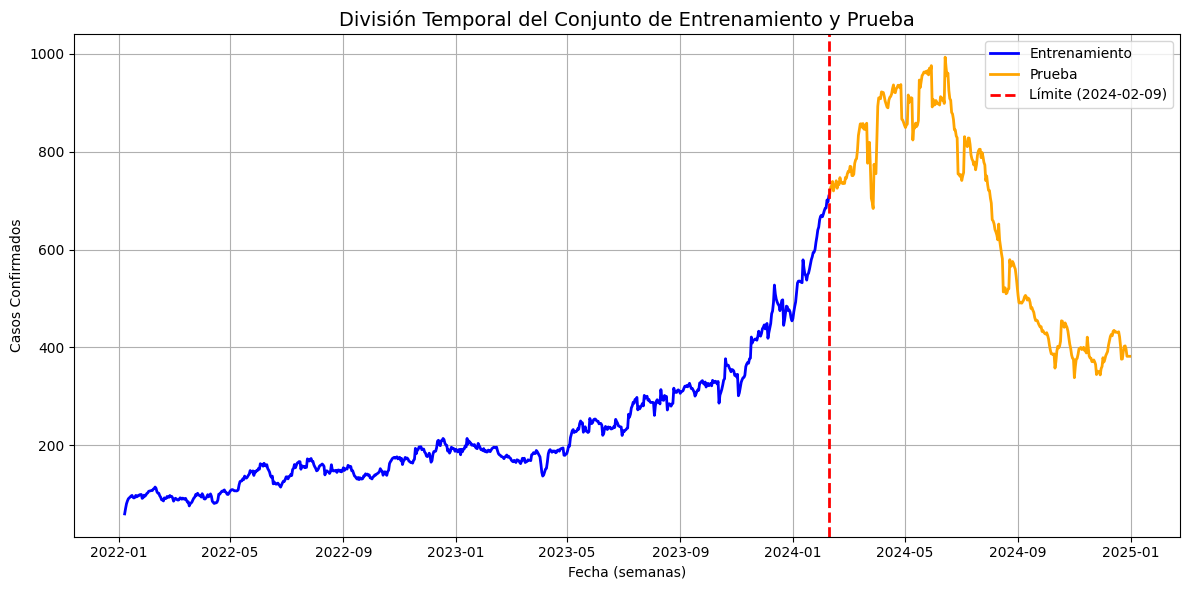

In [48]:
# Visualizar la separación de los datos de entrenamiento y los datos de prueba
plt.figure(figsize=(12,6))
plt.plot(train.index, y_train, label="Entrenamiento", color="blue", linewidth=2)
plt.plot(test.index, y_test, label="Prueba", color="orange", linewidth=2)
plt.axvline(x=limite_fecha, color="red", linestyle="--", linewidth=2, label=f"Límite ({limite_fecha.date()})")
plt.title("División Temporal del Conjunto de Entrenamiento y Prueba", fontsize=14)
plt.xlabel("Fecha (semanas)")
plt.ylabel("Casos Confirmados")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### **Métricas que se usarán para evaluar los modelos**

#### **Métrica principal: MAE (Mean Absolute Error)**

Escogemos esta métrica porque refleja el error absoluto promedio, lo que permite interpretar directamente cuánto se equivoca el modelo en la predicción del número de casos diarios de dengue. Además, penaliza los grandes errores con moderación, evitando que valores atípicos distorsionen la evaluación general del desempeño del modelo. Esto es especialmente útil en el contexto epidemiológico, donde las decisiones deben basarse en estimaciones estables y realistas. El MAE se calcula sumando las diferencias absolutas entre cada valor predicho y el valor real, y luego dividiendo esa suma entre el número total de observaciones, ofreciendo así una medida intuitiva y fácilmente comparable del error.

In [49]:
scoring_principal_metric = 'neg_mean_absolute_error'

#### **R² (Coeficiente de determinación):**
Mide qué proporción de la variabilidad de los datos reales es explicada por el modelo. Un valor cercano a 1 indica un buen ajuste, mientras que valores negativos reflejan un modelo con bajo poder predictivo. Es útil para evaluar la capacidad general del modelo de representar la tendencia de los casos reales.

#### **RMSE (Root Mean Squared Error):**

Representa la raíz cuadrada del error cuadrático medio, indicando cuánto se desvía, en promedio, el valor predicho del valor real en las mismas unidades de la variable objetivo. Penaliza con mayor peso los errores grandes, por lo que es útil para detectar predicciones muy alejadas de los valores observados.

#### **MSE (Mean Squared Error):**
Calcula el promedio de los errores al cuadrado entre las predicciones y los valores reales. Aunque menos interpretable que el MAE, es valioso porque amplifica los errores grandes, ayudando a identificar modelos que tienden a generar predicciones con alta variabilidad o poca estabilidad.

### **3.1 Regresión lineal**

En este modelo se omitió el paso de usar GridSearchCV ya que no hay hiperparámetros que buscar

In [50]:
# hacer modelo de regresion lineal
rl = LinearRegression()
rl.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [51]:
y_pred_lr = rl.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr= np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)


modelos_resultados["Regresión Lineal"] = {
    "model": rl,
    "MAE": mae_lr,
    "MSE": mse_lr,
    "RMSE": rmse_lr,
    "R2": r2_lr,
    "y_pred": y_pred_lr
}

# obtener score train y test
train_score = rl.score(X_train, y_train)
test_score = rl.score(X_test, y_test)
print(f"Train Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")

print(f"\nResultados de métricas en Regresión lineal: ")
print(f"MAE: {mae_lr:.2f}")
print(f"MSE: {mse_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²: {r2_lr:.4f}")

Train Score: 0.9965
Test Score: 0.9904

Resultados de métricas en Regresión lineal: 
MAE: 12.87
MSE: 427.17
RMSE: 20.67
R²: 0.9904


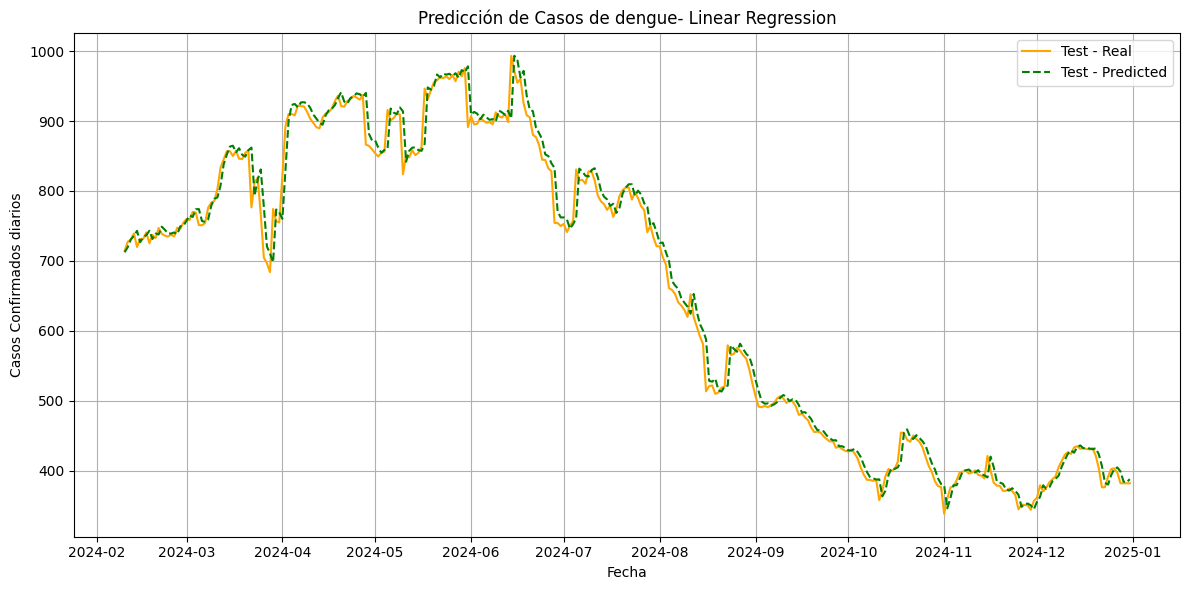

In [52]:
plot_predictions("Linear Regression", y_train, y_test, y_pred_lr)

En todos los siguientes casos se utilizó GridSearchCV para explorar combinaciones de hiperparámetros, optimizar el desempeño en el conjunto de entrenamiento y seleccionar finalmente el mejor modelo que luego se evaluó en el conjunto de prueba. Durante el proceso se hicieron muchos intentos y ajustes sobre los rangos; por claridad y tamaño del notebook no se listan cada uno de esos intentos, pero sí se documentan las razones por las que se seleccionaron esos valores de hiperparámetros en cada modelo. 

### **3.2 Árboles de decisión** 
- **max_depth:** Controla qué tan profundo puede crecer el árbol.
    - Se probaron valores moderados (5, 7, 10) porque profundidades grandes suelen generar sobreajuste en datos ruidosos.
- **min_samples_split:** Número mínimo de muestras necesarias para hacer una división.
    - Valores más altos obligan al árbol a tomar decisiones solo cuando hay evidencia suficiente, reduciendo particiones irrelevantes.
    - Por ejemplo, 2 fuerza a que los nodos tengan al menos 2 muestras para dividirse.
- **min_samples_leaf:** Número mínimo de datos que puede tener una hoja.
    - 1 permite hojas individuales y un ajuste más fino (Riesgo de sobreajuste)
    - 2 y 3 ayudan a mantener hojas representativas y evitar particiones demasiado pequeñas.
- **splitter:** Estrategia de división 
    - Se incluyeron ambos criterios para evaluar si la búsqueda determinística (best) o la estocástica (random) ofrecía mejor capacidad de generalización.




In [53]:
## hacer el modelo de arboles de decision usando grichsearchcv  
param_grid = {
    'max_depth': [5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'splitter': ['best', 'random']
}

grid_dt = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    scoring=scoring_principal_metric,
    cv=tscv,
    n_jobs=-1,
)
grid_dt.fit(X_train, y_train)
print("Mejores parámetros encontrados: ")
print(grid_dt.best_params_)
best_dt = grid_dt.best_estimator_




Mejores parámetros encontrados: 
{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [54]:
y_pred_dt = best_dt.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

modelos_resultados["Árbol de Decisión"] = {
    "model": best_dt,  
    "MAE": mae_dt,
    "MSE": mse_dt,
    "RMSE": rmse_dt,
    "R2": r2_dt,
    "y_pred": y_pred_dt
}

# obtener score train y test
train_score_dt = best_dt.score(X_train, y_train)
test_score_dt = best_dt.score(X_test, y_test)
print(f"Train Score: {train_score_dt:.4f}")
print(f"Test Score: {test_score_dt:.4f}")

print(f"\nResultados de métricas en Árbol de Decisión:")
print(f"MAE: {mae_dt:.2f}")
print(f"MSE: {mse_dt:.2f}")
print(f"RMSE: {rmse_dt:.2f}")
print(f"R²: {r2_dt:.4f}")

Train Score: 0.9969
Test Score: 0.6838

Resultados de métricas en Árbol de Decisión:
MAE: 87.22
MSE: 14067.53
RMSE: 118.61
R²: 0.6838


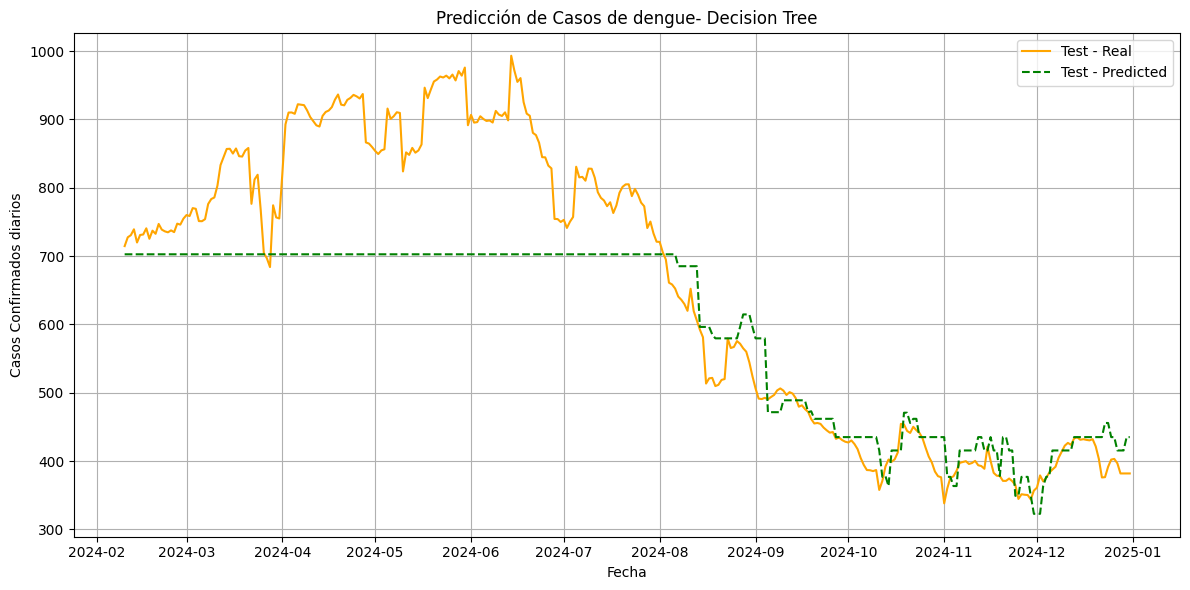

In [55]:
plot_predictions("Decision Tree", y_train, y_test, y_pred_dt)

### **3.3 Random forest**
- **n_estimators:** Número de árboles.
    - Se evaluaron valores entre 50 y 200 porque más árboles aportan estabilidad, pero también aumentan el costo computacional.
- **max_depth:** Controla la profundidad de cada árbol.
    - Valores bajos cómo (5, 10, 20) evitan sobreajuste porque limitan hasta donde puede crecer el árbol, None permite árboles muy complejos para comparar ambos extremos.
- **min_samples_split:** Número mínimo de muestras necesarias para hacer una división.
    - Se probaron valores bajos (2, 5, 10) que controlan el tamaño mínimo de nodos, reduciendo ruido en datos diarios.
- **min_samples_leaf:** Número mínimo de datos que puede tener una hoja.
    - Se eligieron valores superiores a 1 para evitar hojas demasiado pequeñas, lo que ayuda a obtener predicciones más consistentes.
- **max_features:** Número de características consideradas al dividir un nodo.
    - Se evaluaron distintos niveles de selección de características: sqrt y log2 promueven diversidad entre árboles, mientras que None le permite usar todas las variables en     cada división.


In [56]:
param_rf = {
   'n_estimators': [50, 100, 200],            
    'max_depth': [5, 10, 20, None],            
    'min_samples_split': [2, 5, 10],          
    'min_samples_leaf': [2, 4],            
    'max_features': ['sqrt', 'log2', None],    
    'bootstrap': [True, False],
}
rf = RandomForestRegressor(random_state=42)

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_rf,
    scoring=scoring_principal_metric,
    cv=tscv,
    n_jobs=-1,
    verbose=2
)


grid_rf.fit(X_train, y_train)
print("Mejores parámetros encontrados: ")
print(grid_rf.best_params_)
best_rf = grid_rf.best_estimator_



Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Mejores parámetros encontrados: 
{'bootstrap': False, 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [57]:
y_pred_rf = best_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

modelos_resultados["Random Forest"] = {
    "model": best_rf,  
    "MAE": mae_rf,
    "MSE": mse_rf,
    "RMSE": rmse_rf,
    "R2": r2_rf,
    "y_pred": y_pred_rf
}

# obtener score train y test
train_score_rf = best_rf.score(X_train, y_train)
test_score_rf = best_rf.score(X_test, y_test)
print(f"Train Score: {train_score_rf:.4f}")
print(f"Test Score: {test_score_rf:.4f}")

print("\nResultados de las métricas en Random Forest: ")
print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²: {r2_rf:.4f}")

Train Score: 0.9995
Test Score: 0.6785

Resultados de las métricas en Random Forest: 
MAE: 87.27
MSE: 14302.04
RMSE: 119.59
R²: 0.6785


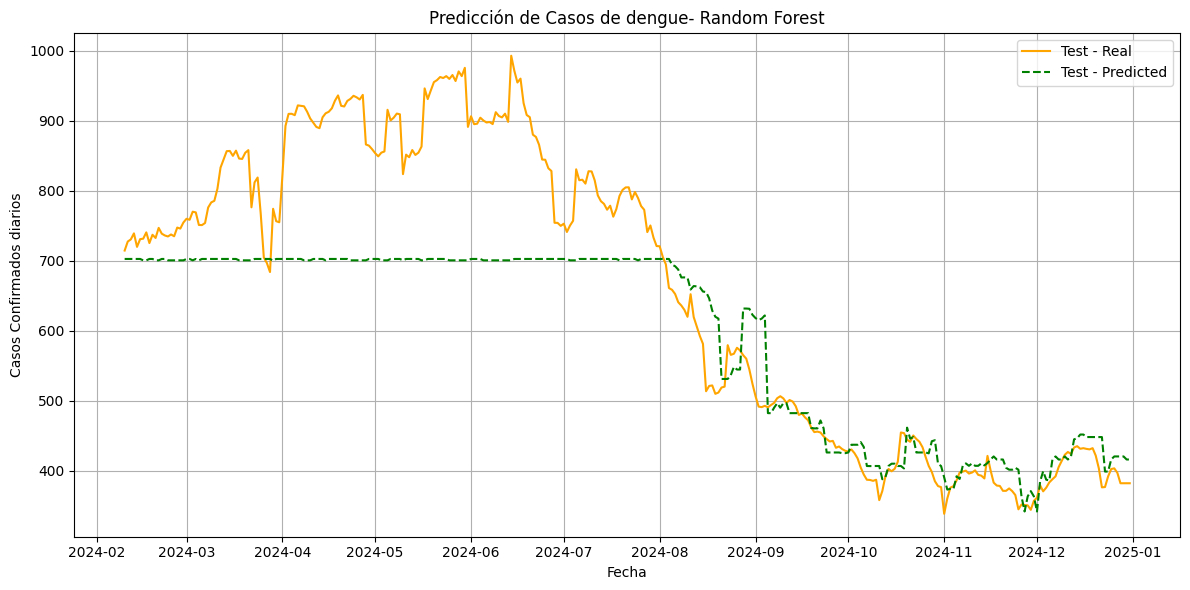

In [58]:
plot_predictions("Random Forest", y_train, y_test, y_pred_rf)

### **3.4 Perceptrón multicapa**
- **hidden_layer_sizes:** Define la arquitectura de la red neuronal, es decir, el número de capas ocultas y neuronas en cada capa.
    - (128,) red con una sola capa oculta de 128 neuronas
    - (64, 64) red con dos capas ocultas de 64 neuronas cada capa
    - (128, 64) red con dos capas ocultas la primera capa cuenta con 128 neuronas y la segunda con 64
- **activation:** Función de activación usada en las capas ocultas
    - relu funciona mejor en la mayoría de tareas y evita gradientes pequeños.
    - tanh se probó porque puede capturar relaciones más suaves, lo cual es útil en series temporales.
- **solver:**  Algoritmo para optimizar los pesos de la red
    - adam converge rápido y suele funcionar bien sin muchos ajustes.
    - sgd(El descenso de gradiente estocástico) se probó como alternativa ya que es útil si se requiere más estabilidad o regularidad.
- **learning_rate_init:** Tasa de aprendizaje inicial
    - Se evaluaron tasas pequeñas y moderadas, (0.001) para un aprendizaje gradual, (0.01) equilibrio entre velocidad y estabilidad (0.1) para evaluar un aprendizaje más acelerado
- **max_iter:** Número máximo de iteraciones durante el entrenamiento
    - Se fijaron iteraciones altas (2000, 4000)para asegurar convergencia, ya que las redes suelen requerir mayor tiempo de entrenamiento.

In [59]:
param_mlp = {
    'hidden_layer_sizes': [(128,), (64, 64), (128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [2000, 4000]
}

grid_mlp = GridSearchCV(
    estimator=MLPRegressor(random_state=42),
    param_grid=param_mlp,
    scoring=scoring_principal_metric,
    cv=tscv,
    n_jobs=-1,
)


In [60]:
grid_mlp.fit(X_train, y_train)
print("Mejor combinación de parámetros:", grid_mlp.best_params_)

Mejor combinación de parámetros: {'activation': 'relu', 'hidden_layer_sizes': (128, 64), 'learning_rate_init': 0.01, 'max_iter': 2000, 'solver': 'adam'}


Train Score: 0.9964
Test Score: 0.9882
Resultados de las métricas en Perceptrón Multicapa:
MAE  = 15.22
MSE  = 523.35
RMSE = 22.88
R²   = 0.988


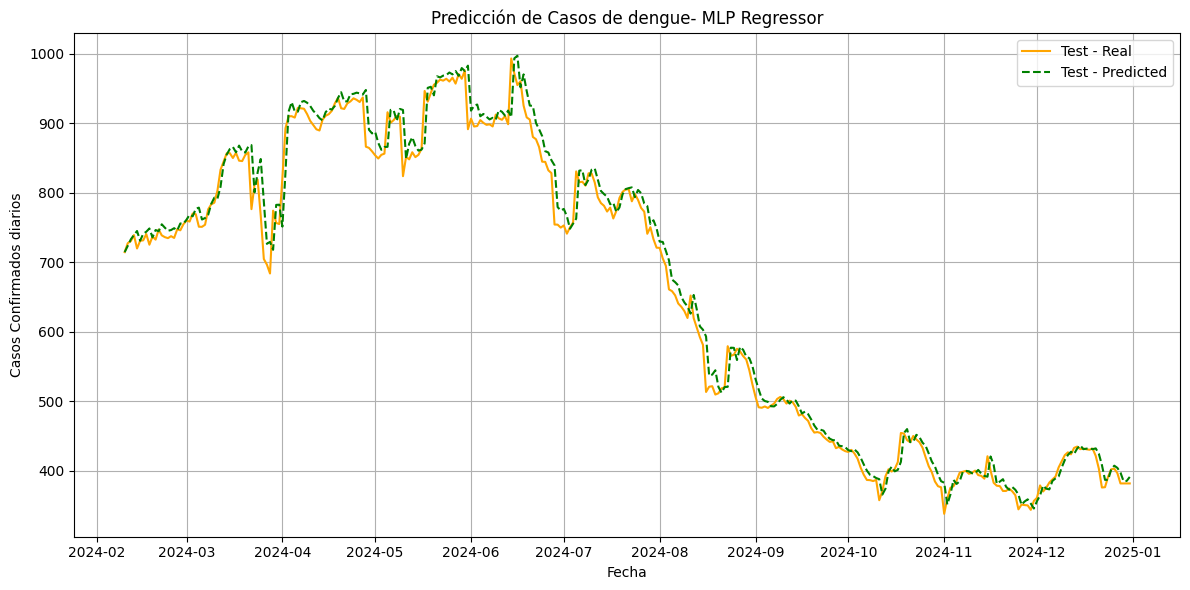

In [61]:
# Obtener el mejor modelo
best_mlp = grid_mlp.best_estimator_

# Predicciones
y_pred_mlp = best_mlp.predict(X_test)

# Métricas
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

modelos_resultados["Perceptrón Multicapa"] = {
    "model": best_mlp,
    "MAE": mae_mlp,
    "MSE": mse_mlp,
    "RMSE": rmse_mlp,
    "R2": r2_mlp,
    "y_pred": y_pred_mlp
}

# obtener score train y test
train_score_mlp = best_mlp.score(X_train, y_train)
test_score_mlp = best_mlp.score(X_test, y_test)
print(f"Train Score: {train_score_mlp:.4f}")
print(f"Test Score: {test_score_mlp:.4f}")

print(f"Resultados de las métricas en Perceptrón Multicapa:")
print(f"MAE  = {mae_mlp:.2f}")
print(f"MSE  = {mse_mlp:.2f}")
print(f"RMSE = {rmse_mlp:.2f}")
print(f"R²   = {r2_mlp:.3f}")
plot_predictions("MLP Regressor", y_train, y_test, y_pred_mlp)

### **3.5 Redes neuronales profundas**
- **n_units:** Número de unidades (neuronas) en la capa LSTM.
    - 32 para una arquitectura ligera.
    - 64 para permitir una representación más amplia de la dinámica temporal. 
- **Optimizer:** Optimizador usado para actualizar pesos
    - Se mantuvo fijo "adam" debido a su buen desempeño general en redes recurrentes.
- **epochs:** Número de épocas de entrenamiento
    - Se probaron diferentes niveles de entrenamiento: 25 para una convergencia rápida, 50 como punto intermedio y 75 por si el modelo necesitaba más iteraciones para estabilizarse
- **batch_size** Tamaño del lote (número de muestras procesadas antes de actualizar los pesos)
    - 16: permite actualizaciones más dinámicas y sensibles a pequeños patrones.
    - 32: aporta un comportamiento equilibrado entre estabilidad y adaptabilidad.
    - 64: favorece un aprendizaje más uniforme y robusto al reducir la variabilidad entre pasos.

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Epoch 1/75
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 36896.2773
Epoch 2/75
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1379.7150
Epoch 3/75
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 201.6190
Epoch 4/75
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 121.1985
Epoch 5/75
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 110.9377
Epoch 6/75
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 102.7822
Epoch 7/75
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 96.3924
Epoch 8/75
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 92.4504 
Epoch 9/75
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 92.0487
Epoch 10/75
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 84.0134
Epoch 11/75
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 82.1173
Epoch 12/75
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 89.9535
Epoch 13/75
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 76.3829
Epoch 14/75
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 77.2400


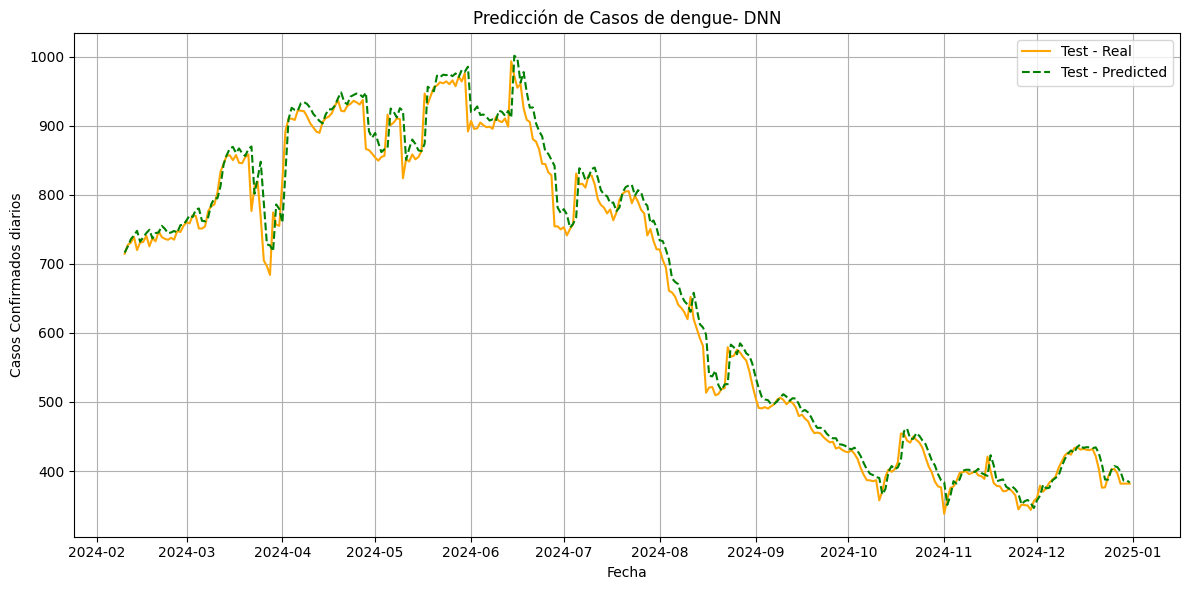

In [62]:
# Preparar datos para LSTM
X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
y_train_lstm = y_train.values
y_test_lstm = y_test.values

# cargando modelo pre-entrenado para series de tiempo 
model_base = None
def build_lstm_model(n_units=50, optimizer='adam'):
    layers = []
    
    if model_base:
        pass
    
    layers += [
        LSTM(n_units, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
        Dense(64, activation='relu'),
        Dense(1)
    ]
    
    model = Sequential(layers)
    model.compile(optimizer=optimizer, loss='mse')
    return model

# usar gridsearchcv para variar los parametros

keras_reg = KerasRegressor(build_fn=build_lstm_model, verbose=1)

param_grid = {
    'model__n_units': [32, 64],
    'model__optimizer': ['adam'],
    'fit__epochs': [25, 50, 75],
    'fit__batch_size': [16, 32, 64],
}

grid = GridSearchCV(
    estimator=keras_reg,
    param_grid=param_grid,
    scoring=scoring_principal_metric,
    cv=tscv,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train_lstm, y_train_lstm)
print("Mejor combinación de parámetros:", grid.best_params_)

best_lstm = grid.best_estimator_.model

# Hacer predicciones
y_pred_lstm = grid.best_estimator_.predict(X_test_lstm)
mae_lstm  = mean_absolute_error(y_test_lstm, y_pred_lstm)
mse_lstm  = mean_squared_error(y_test_lstm, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm   = r2_score(y_test_lstm, y_pred_lstm)

modelos_resultados["DNN"] = {
    "model": best_lstm,
    "MAE": mae_lstm,
    "MSE": mse_lstm,
    "RMSE": rmse_lstm,
    "R2": r2_lstm,
    "y_pred": y_pred_lstm
}

print(f"\nResultados de las meétricas en DNN:")
print(f"MAE: {mae_lstm:.2f}")
print(f"MSE: {mse_lstm:.2f}")
print(f"RMSE: {rmse_lstm:.2f}")
print(f"R²: {r2_lstm:.4f}")
plot_predictions("DNN", y_train, y_test, y_pred_lstm)


In [63]:
modelos_resultados_df = pd.DataFrame.from_dict(modelos_resultados, orient='index')
modelos_resultados_df = modelos_resultados_df[['MAE', 'MSE', 'RMSE', 'R2']]
modelos_resultados_df.sort_values(by='MAE')
modelos_resultados_df

,MAE,MSE,RMSE,R2
Regresión Lineal,12.874612,427.167932,20.668041,0.990399
Árbol de Decisión,87.224303,14067.526308,118.606603,0.683806
Random Forest,87.266982,14302.042291,119.591146,0.678535
Perceptrón Multicapa,15.216839,523.346489,22.876767,0.988237
DNN,16.382390,561.520612,23.696426,0.987379


### **Análisis de los resultados obtenidos por cada modelo**

A continuación se presenta un análisis de cada modelo utilizando los valores observados en las métricas **MAE**, **MSE**, **RMSE** y **R²**. El objetivo es interpretar qué tan bien se desempeñó cada modelo según los resultados mostrados en las gráficas y las métricas que obtuvieron

---

#### **1. Regresión Lineal**
La regresión lineal obtuvo **uno de los mejores desempeños generales**.  
- **MAE ≈ 12.87**, un error promedio bajo.  
- **MSE ≈ 427.17** y **RMSE ≈ 20.67**, valores reducidos, lo que indica que casi no presenta errores grandes.  
- **R² ≈ 0.9904**, mostrando que es capaz de explicar prácticamente toda la variabilidad de los datos.

Este modelo logra capturar adecuadamente la tendencia del comportamiento del dengue, con errores mínimos y una alta capacidad explicativa.

---

#### **2. Árbol de Decisión**
El árbol de decisión presentó un desempeño significativamente inferior.  
- **MAE ≈ 87.22**, indicando errores promedio muy altos.  
- **MSE ≈ 14067.53** y **RMSE ≈ 118.60**, lo que evidencia errores severos en las predicciones.  
- **R² ≈ 0.6838**, lo que significa que solo explica una parte moderada de la variación.  

El modelo parece sufrir de sobreajuste o incapacidad para generalizar, produciendo predicciones muy dispersas frente a los valores reales.

---

#### **3. Random Forest**
El Random Forest mostró un comportamiento muy similar al Árbol de Decisión.  
- **MAE ≈ 87.26**, prácticamente igual al árbol individual.  
- **MSE ≈ 14302.04** y **RMSE ≈ 119.59**, incluso ligeramente superiores.  
- **R² ≈ 0.6785**, un nivel de explicación bajo en comparación con los mejores modelos.  

Aunque los bosques suelen mejorar el rendimiento respecto a un solo árbol, en este caso no lograron capturar adecuadamente la dinámica del problema.

---

#### **4. Perceptrón Multicapa (MLP)**
El perceptrón multicapa obtuvo resultados competitivos.  
- **MAE ≈ 15.21**, ligeramente superior al de la regresión lineal, pero aún bajo.  
- **MSE ≈ 523.35** y **RMSE ≈ 22.87**, lo que indica errores moderados pero controlados.  
- **R² ≈ 0.9882**, mostrando que explica casi toda la variabilidad del conjunto de datos.  

Este modelo demuestra una buena capacidad de aprendizaje y generalización, ofreciendo predicciones estables y precisas.

---

#### **5. LSTM**
El modelo LSTM también logró un desempeño sólido.  
- **MAE ≈ 16.38**, cercano al de la regresión lineal.  
- **MSE ≈ 561.52** y **RMSE ≈ 23.69**, valores reducidos que reflejan buena precisión.  
- **R² ≈ 0.9874**, comparable con el del perceptrón multicapa y altamente satisfactorio.  

Este modelo es capaz de capturar patrones temporales de forma adecuada, lo que se traduce en predicciones consistentes y precisas.

## **4. Comparación de los modelos entrenados y conclusiones**

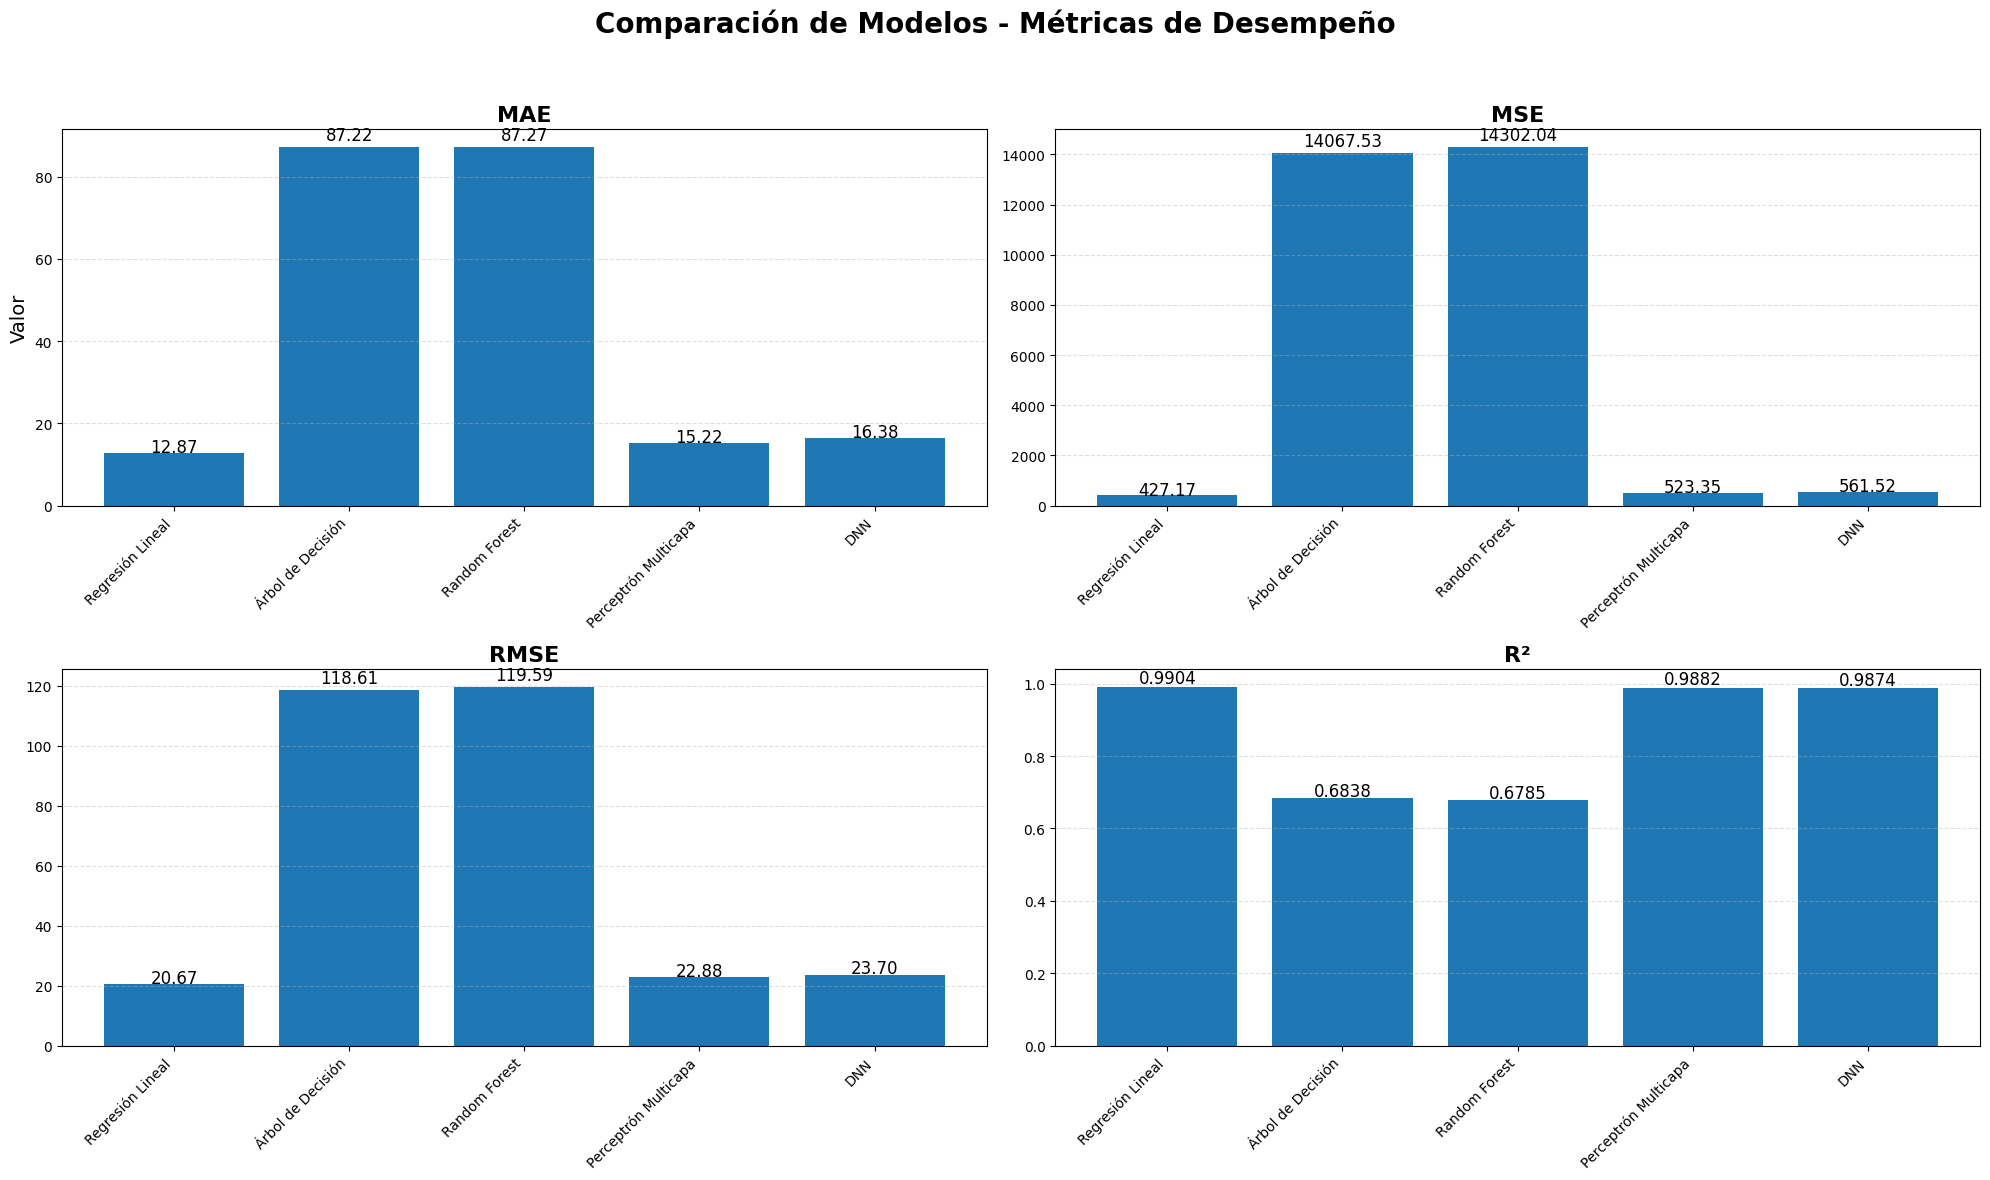

In [64]:
# Extraer métricas
model_names = list(modelos_resultados.keys())
mae_scores = [modelos_resultados[m]["MAE"] for m in model_names]
mse_scores = [modelos_resultados[m]["MSE"] for m in model_names]
rmse_scores = [modelos_resultados[m]["RMSE"] for m in model_names]
r2_scores = [modelos_resultados[m]["R2"] for m in model_names]

# Crear figura
plt.figure(figsize=(20, 12))
plt.suptitle("Comparación de Modelos - Métricas de Desempeño",
             fontsize=20, fontweight="bold")

# SUBPLOT 1: MAE 
plt.subplot(2, 2, 1)
bars = plt.bar(model_names, mae_scores)
plt.title("MAE", fontsize=16, fontweight="bold")
plt.ylabel("Valor", fontsize=14)
plt.xticks(rotation=45, ha="right")

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + h*0.02, f"{h:.2f}",
             ha='center', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# SUBPLOT 2: MSE
plt.subplot(2, 2, 2)
bars = plt.bar(model_names, mse_scores)
plt.title("MSE", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha="right")

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + h*0.02, f"{h:.2f}",
             ha='center', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# SUBPLOT 3: RMSE
plt.subplot(2, 2, 3)
bars = plt.bar(model_names, rmse_scores)
plt.title("RMSE", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha="right")

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + h*0.02, f"{h:.2f}",
             ha='center', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# SUBPLOT 4: R²
plt.subplot(2, 2, 4)
bars = plt.bar(model_names, r2_scores)
plt.title("R²", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha="right")

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + h*0.01, f"{h:.4f}",
             ha='center', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

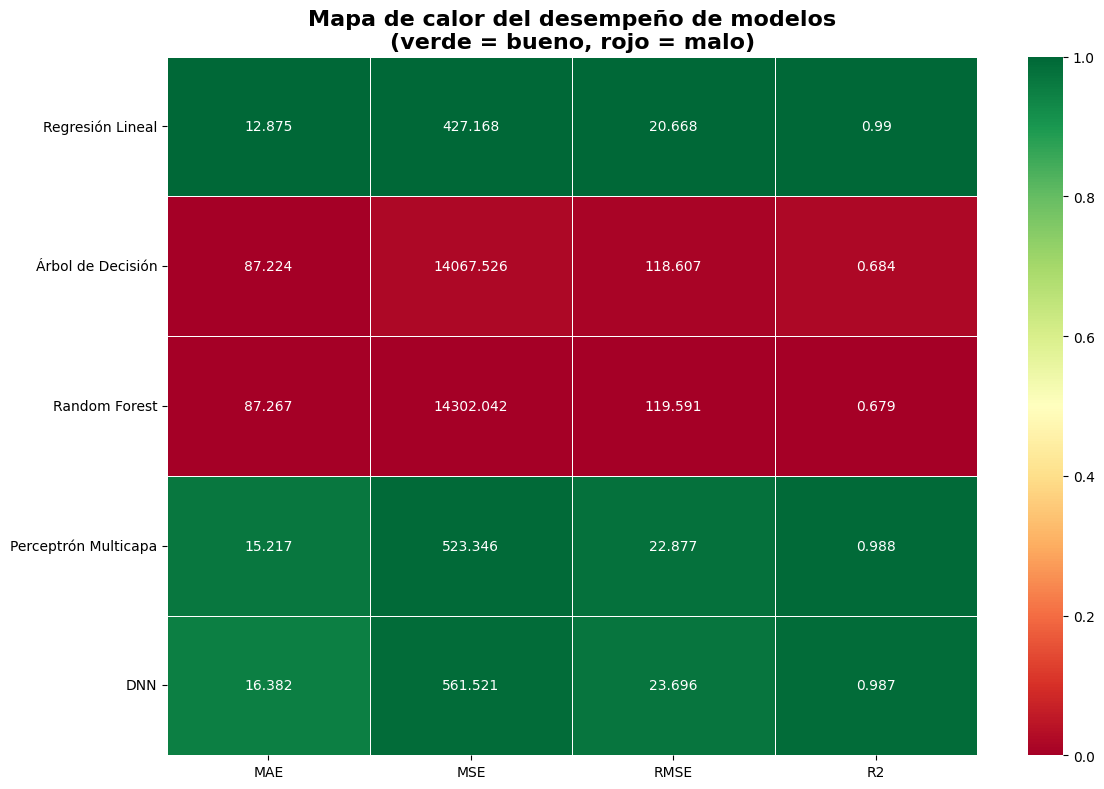

In [65]:
df = modelos_resultados_df.copy()

metricas_bajan = ["MAE", "MSE", "RMSE"]

# Crear dataFrame normalizado
df_norm = df.copy().astype(float)

for col in df.columns:
    valores = df[col].values
    mn, mx = valores.min(), valores.max()

    # Normalización distinta según si menor es mejor o mayor es mejor
    if col in metricas_bajan:
        # Para estas métricas: menor - mejor
        df_norm[col] = 1 - (valores - mn) / (mx - mn)
    else:
        # Para R2: mayor - mejor
        df_norm[col] = (valores - mn) / (mx - mn)

plt.figure(figsize=(12, 8))
sns.heatmap(
    df_norm,
    annot=df.round(3),
    fmt="",
    cmap="RdYlGn",       # rojo → malo, verde → bueno
    vmin=0, vmax=1,
    linewidths=0.5,
    linecolor="white",
    annot_kws={"fontsize":10}
)

plt.title("Mapa de calor del desempeño de modelos\n(verde = bueno, rojo = malo)", fontsize=16, fontweight="bold")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### **Tabla Resumen de Resultados por Modelo**

| Modelo              | MAE     | MSE        | RMSE    | R²       |
|--------------------|---------|------------|---------|----------|
| Regresión Lineal   | 12.87   | 427.17     | 20.67   | 0.9904   |
| Árbol de Decisión  | 87.22   | 14067.53   | 118.60  | 0.6838   |
| Random Forest      | 87.26   | 14302.04   | 119.59  | 0.6785   |
| Perceptrón Multicapa (MLP) | 15.21 | 523.35 | 22.87 | 0.9882 |
| LSTM               | 14.52   | 514.05    | 22.67   | 0.9884  |


## **5. Conclusión general**

El estudio permitió construir y evaluar distintos modelos para predecir la evolución de los casos de dengue, apoyados en una ingeniería de características que incluyó lags, medias móviles, variables de variabilidad y atributos temporales. Estas transformaciones, junto con la suavización mediante una media móvil de 7 días para reducir el ruido de la serie, ayudaron a resaltar la tendencia real y proporcionaron a los modelos un contexto más claro para aprender. Además, trabajar con casos diarios —y no con valores semanales, como era la idea inicial— resultó beneficioso, ya que incrementó considerablemente la cantidad de datos disponibles y permitió que los modelos capturaran mejor los cambios y patrones a corto plazo, mejorando su capacidad predictiva.

Los resultados mostraron un contraste claro entre enfoques. Los modelos basados en árboles fueron los de menor rendimiento, evidenciando dificultades para captar la continuidad y progresión temporal del dengue; estos métodos no representan bien la relación secuencial entre los días ni extrapolan tendencias de forma natural, por lo que terminan ajustándose a patrones específicos del pasado y generalizan mal cuando deben seguir la evolución real de la serie. En cambio, la Regresión Lineal y las Redes Neuronales mostraron los mejores resultados. El buen desempeño de la regresión se explica, en gran parte, por la suavización previa, que generó una tendencia más estable y cercana a una relación lineal. Por su parte, las redes neuronales aprovecharon la información adicional proveniente de los lags y ventanas móviles para capturar patrones más complejos.



## **6. Trabajo futuro**

- **Ampliar la ventana temporal de análisis**, incorporando entre 5 y 10 años de datos, permitiría entrenar modelos más robustos y capaces de reconocer patrones estacionales de mayor duración. En este estudio únicamente se utilizaron tres años (2022–2024), por lo que una serie más extensa podría mejorar notablemente la calidad de las predicciones.

- **Explorar la agregación mensual de los casos**, ya que trabajar con valores consolidados por mes reduce la variabilidad diaria y ofrece información más útil para la planificación epidemiológica. Este enfoque complementa el análisis diario y facilita la toma de decisiones estratégicas.

- **Incorporar variables externas**, como indicadores meteorológicos (temperatura, precipitación, humedad), movilidad poblacional, lo cual puede enriquecer el modelo y mejorar su capacidad predictiva.

- **Evaluar modelos clásicos de series temporales**, como ARIMA, SARIMAX y sus variantes estacionales, que permiten modelar dependencias autoregresivas y patrones de tendencia de manera explícita.

- **Profundizar en modelos neuronales con mejores prácticas de entrenamiento**, aplicando técnicas de regularización como dropout o early stopping, así como un escalado adecuado de las variables, para obtener modelos más estables y con mejor capacidad de generalización.